# Data Science for Business Applications
> "Exam Project: Features for Creating a Successful Business - An Analysis on Yelp Reviews"

- toc:true
- branch: master
- badges: true
- comments: true
- author: "authors: 119183, 132492 & 143192"
- categories: [fastpages, jupyter]

---
#Executive Summary
---
This section elaborates on the relevance of our analysis and methods utilized in this paper for business-decision purposes. 

The main purpose with this paper is to allow a chosen category of businesses, in a specific area, to filter relevant reviews and based on this, make better-informed choices. In this paper we discover the most popular categories and cities that have been reviewed. Based on that, we chose to delve into Phoenix with relatively high demand(reviews) and low market saturation. We conduct a thorough sentiment analysis on the negative and positive reviews, which allows the businesses to grasp an understanding of what their customers are satisfied and dissatisfied about. This entails a comprehension of what facets to improve in the various nightlife entities. By also identifying the customers that tend to be extremely positive and negative, we aim to exclude the reviews that tend to be too extreme in order to reduce the biases in our project. Specifically, when analysing the nightlife in Phoenix, we figure out the most popular nightlife categories, which draws a picture of what new entrants should consider opening in order to increase the success rate at launch. **((((Write about topic modeling))))**



---
#Introduction to the Data
---

In this project, we have chosen to work with an open dataset provided by Yelp (you can download and read more about the data set [here](https://www.yelp.com/dataset)).

Yelp is an online review platform that enables people to find user recommendations of a wide range of businesses - and write reviews of their own experiences. To give a review as user is asked to give a star rating on a scale from 1 to 5 and include a description of the experience the user had with the entity.

This dataset was made available for use in personal, educational and academic purposes. It is a subset consisting of reviews, businesses and users across 10 metropolitan areas. More specifically, it contains data on more than 8 million reviews, two-hundred-thousand businesses, and almost 2 million users. The dataset is downloaded as a  compressed tar-file format. Uncompressed there are 5 json-files and  a total of 9.8GB data - a rather huge dataset.

On a Data Science stand point this dataset is rather interesting as it contains a vast amount of data, including structured and unstructured data (text). For the more demanding project, Yelp has made an additional dataset available containing 200.000 photos that has been posted on their platform in connection with the reviews. These photos however, are not included in this project.

##Problem Statement
After a thorough inspection of the documentation, we decided to use three main data sets: *Business.json*, *review.json* and *user.json*. Thus, check-ins and tips (shorter reviews) has been excluded from the analysis.

We found these datasets to be interesting for our project as they contain text reviews and additional related data about the users that has writes the reviews and the businesses that reviewed. This allows us to extract features of the data to gain important and actionable insights about the businesses and the markets they operate in.

Inspired by House of Cards ([How Netflix Used Data Science to Create One of the Most Loved Shows Ever: House of Cards](https://www.jigsawacademy.com/how-netflix-used-data-science-to-create-one-of-the-most-loved-shows-ever-house-of-cards/)) we came up with an interesting subject for analysis - our problem statement:

###Question for Analysis

> **What are the features that seperates the best and worst performing businesses - and how can we use these insights to create a successful new business concept?**

##Description of the Datasets

> A description of the dataset is listed in the [documentation](https://www.yelp.com/dataset/documentation).

Here, we provide you with a simplified description of the datasets:

**Business.json** 

Contains bussiness data including location data, attributes and categories:

* business_id: ID of the business
* name: name of the business
* address: address of the business
* city: city of the business
* state: state of the business
* postal_code: postal code of the business
* latitude: latitude of the business
* longitude: longitude of the business
* stars: average rating of the business
* review_count: number of reviews received
* is_open: 1 if the business is open, 0 if the business has closed down
* attributes: 
* categories: multiple categories of the business
* hours: business opening hours
 
**Review.json**

Contains full review text data including the user_id that wrote the review and the business_id the review was written for:
* review_id: ID of the review
* user_id: ID of the user
* business_id: ID of the business
* stars: stars given in review
* date: time of review
* text: the review
* useful: number of people that found the review useful 
* funny: number of people that found the review funny
* cool: number of people that found the review cool

**User.json**

Contains user data including the user's friend mapping and all the metadata associated with the user.
* user_id: ID of the review
* name: name of the user
* review_count: number of reviews given
* yelping_since: user creation date
* friends: the user’s friends as an array of user_ids
* useful: number of useful vores sent by the user
* funny: number of funny vores sent by the user
* cool: number of cool vores sent by the user
* fans: number of fans the user has
* elite: years the user had elite status as an array.
* average_stars: average star rating given by the user
* compliments: number of times the user was complimented.

##Methodology

###Steps of Analysis

To anwer the question of interest, we will perform an **exploratory data analysis** (EDA) to gain an understanding of the business context and which factors that has proven a business successful or not. Here, we will investigate what business categories that the users are mostly interested in and where the demand is located. Furthermore, we explore which businesses that has been successful in attracting customers to their business and how well they succeed in satisfying the consumers' needs. Finally, for the data exploration, we investigate the correlation between customer satisfaction and whether the business is still in business or not.

From the EDA a few businesses of interest will be further investigated by applying **Topic Modeling** to understand what features in the reviews that set the best performing businesses apart from the lowest performing businesses. These insights can help future businesses to design a better business model and to know what the customers' main success criteria and complaints are.

Moreover, we will apply a **supervised machine learning** model on top of the topic modeling to enable businesses to predict the outcome of different narratives. This will enable businesses to delve deeper into their business design and make decision on what features they should include in order to provide the best possible customer experience. I other words, this model enables business to design their business on the narratives they would like the customers to experience - a very powerful tool.

###Preprocessing Steps

To prepare our data for analysis we will start by delimitting the data to represent a business category and location of interest. We do this as we assume that customer demand may wary across different locations and categories.

Moving on, we will look at the users and identify those that tend to be too negative or positive in their reviews. This is an important step, as some users might be “notorious complainers” and thus might skew the results.

Similarly, the number of reviews assigned to a business is an important aspect to consider - the less amount of data the less representative. These businesses will therefore present unreliable results. In order to avoid this problem, we will filter out businesses that fail to exceed a number of reviews assigned to them.

**Limitation:**
 
We only read in 1,000,000 lines of data from the *review.json* as well as from the *user.json*. Those 2 data sets were rather large, and our computers lacked the necessary memory to work with them. What this means is that we “lost” some information, however we thought that this would not interfere with our ability to demonstrate our proficiency of the newly acquired methods and tools. (Data preprocessing, EDA, Topic Modeling, SML, etc.) Eventually, our “final” data set (*phoenix_nightlife.csv*) reached a size of 1 GB, thus we had plenty of data to work with.

---
#Data exploration, narrowing scope of analysis and preprocessing
---

###Installation & Libraries

As usual, before we can initialize the data exploration steps, we will need a repository of libraries to work with the data. 

We have provided you with interactive buttons throughout this page, that you can use to display or hide certain code cells of your interest. As such, we have provided you with a list of the installations and libraries below.

We wish you happy reading!

In [ ]:
#collapse-hide

#Installations
!pip install wordcloud

#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from sklearn import metrics
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.utils as utils
from sklearn.naive_bayes import MultinomialNB
import joblib as joblib

from google.colab import files #Use to upload single files from local directory
from google.colab import drive #Use to mount google drive to access documents saved in the cloud

> Note: Not all code cells are displayed in this page. For the full notebook, please refer to the GitHub, Binder or Colab as listed in the top of this page.

##Delimiting the datasets

To efficiently work with the data, we have created a google drive folder and mounted it to Colab. We have filled the drive with all the relevant json-files and will also be used to host future data sets that are created throughout this project. You can view the Drive [here](https://drive.google.com/drive/folders/1anYSKGV52MSNZStJ9o2N66gJTJxfLtOd?fbclid=IwAR3wZ3Dk-StfGSAN4qPKNViFFnNJH4EfjADX1vqDSIuSprPEREn5lve4Xn0).



In [ ]:
#hide
drive.mount('/content/drive') #Mounts Google Drive that holds the data.

Mounted at /content/drive


In this section we will delimit the geographic area of research to a specific business category and area of interest. This allows us to dig deeper into the data and compare businesses that operate within the same space.

We will start by identifying which business categories that are the most popular. Later, we will look at the businesses' locations to identify which location is the most interesting for a new business to enter. Here, popularity is defined as the number of businesses that are working within the same category, while the most interesting locations are defined as those with the highest demand compared to the current supply (the locations with the lowest market saturation). It is assumed that the barrier of entry for any given business is lowest when the market saturation is similarly low. Thus, this provides a great indicator of where to invest in a new business.

###Delimit by Business Category
Let's start by looking at the business.json data:

In [ ]:
#collapse-hide
business_json_path = '/content/drive/MyDrive/DSBA_Project/yelp_dataset/yelp_academic_dataset_business.json'

business = pd.read_json(business_json_path, lines=True)
business.head()

business_id  ...                                              hours
0  f9NumwFMBDn751xgFiRbNA  ...  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...
1  Yzvjg0SayhoZgCljUJRF9Q  ...                                               None
2  XNoUzKckATkOD1hP6vghZg  ...                                               None
3  6OAZjbxqM5ol29BuHsil3w  ...  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...
4  51M2Kk903DFYI6gnB5I6SQ  ...  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

[5 rows x 14 columns]

From the data we see that the each business are assigned to multiple categories. For instance, Felinus is working within three different categories: 'pets, pet services and pet groomers'.

To identify the most popular category, each business is split into multiple rows, each containing just one single category. Thus, Felinus will be split into 3 rows. Finally, each category is counted to display the ones that are appearing most often within the business data:

It is important to note that some businesses have closed down and are no longer in operation. We might not want to include these when trying to find the most popular business categories.



In [ ]:
#hide
drop_columns = ['address', 'latitude', 'longitude', 'hours']
business = business.drop(drop_columns, axis= 1)

> Note: adress, latitude, longitude and hours has been excluded from the data.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


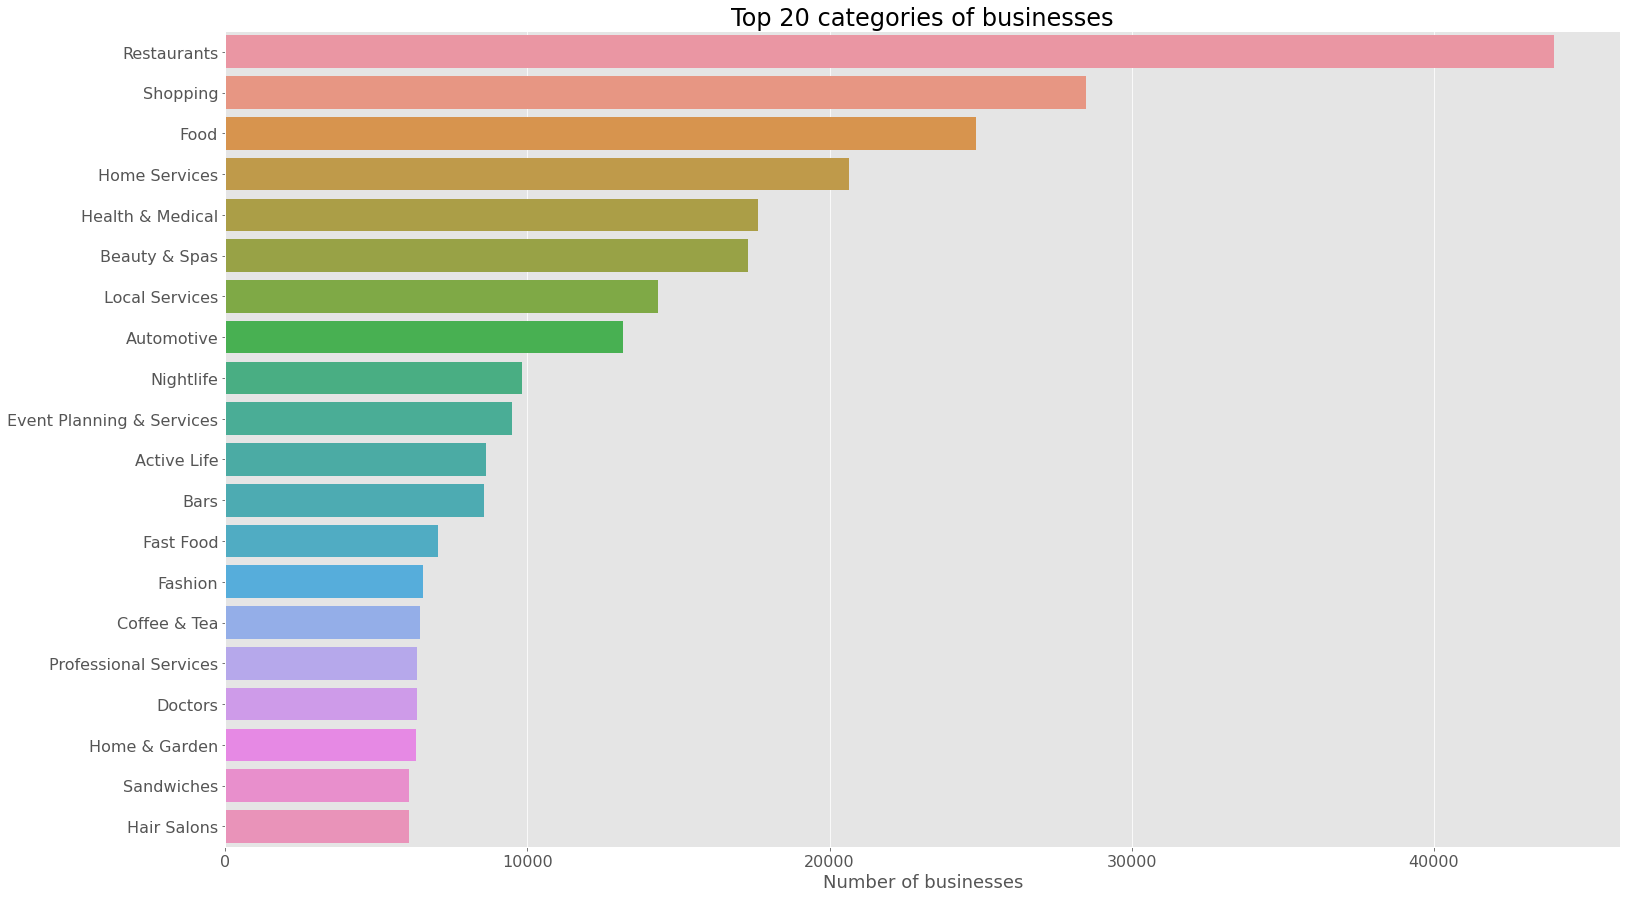

In [ ]:
#collapse-hide
business_open = business[business.is_open == 1] #Filter out business that has closed
business_explode = business_open.assign(categories = business_open.categories.str.split(', ')).explode('categories') #Split categories into multiple rows
business_popular_cat = business_explode.categories.value_counts() #Count number of times a category appears in the data
business_popular_cat = pd.DataFrame(business_popular_cat)

#Visualization of the 20 most popular business categories
plt.figure(figsize= (25, 15))
plt.style.use('ggplot')
sns.barplot(business_popular_cat.categories[:20], business_popular_cat.index[:20])
plt.title('Top 20 categories of businesses', fontdict= {'fontsize': 24})
plt.xlabel('Number of businesses', fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('categories_top_20.png')

####Chosen Category of Interest

As seen by the barplot, more than 40.000 restaurants are listed on Yelp's platform, making restaurants by far the most popular business category. This could be a clear indication of a business category with fierce competition but could also prove a great place of analysis, as this business segment might need a thorough understanding of the customers' needs in order to successfully position itself in the market, more than any other business.

Even so, we delimit our analysis to the 9th most commonly listed category on Yelp: the Nightlife category. We found this category particularly interesting to analyse, as we believe nightlife is a very complex business area where the lines that defines a successful business are quite blurred and washed out. Our hopes are that we through our analysis can gain a better understanding of which features that are important for customers to give them a great experience and help new businesses in creating successful business concepts. Moreover, we believe that with almost 10.000 businesses operating in the nightlife landscape, there is great data potential to be covered.

###Delimit by Location



In [ ]:
#hide

#This line of code filters the original business.json dataset to only include businesses that are working in the nightlife category.
business_nightlife = business[business['categories'].str.contains('Nightlife', case= False, na= False)]

In this step, we are going to look at where the businesses are located and which location has the highest concentration of businesses relative the demand of the consumers.

To do this, we are going to work with data from business.json and data from review.json.

To work with the review data, we will follow a method provided by [towardsdatascience](https://towardsdatascience.com/converting-yelp-dataset-to-csv-using-pandas-2a4c8f03bd88), in which we iterate through the data in smaller chunks of 1.000.000 rows. This results in lower memory usage, reduces the time to load and allows us to check results faster. Moreover, this is a necessary step as the computation exceeds our systems' capable memory by far, and returns an error. Simultaniously, the review data is merged (inner) with our chosen business category - nightlife businesses.

####Merge Review and Business Datasets

> Important: The following code cannot be executed in Google Colab. A local client must be used.

In [ ]:
#collapse-show

reviews_json_path = 'D:/projects/NLP project DS/yelp_academic_dataset_review.json'
size = 1000000 #Defines the number of rows that will be loaded from the dataset 

review = pd.read_json(reviews_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str, 'business_id':str,'stars':int, 'date':str,'text':str,'useful':int, 'funny':int,'cool':int},
                      chunksize=size)

#Create a random sample
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis= 1)
    chunk_review = chunk_review.rename(columns= {'stars': 'review_stars'})

    #Merge reviews with the chosen business category
    chunk_merged = pd.merge(business_nightlife, chunk_review, on= 'business_id', how= 'inner')

    #Print the number of times nightlife category showed up in the chunk
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)

    #The pandas chunk method creates a JsonReader object for iteration.
    ##Concatenate all relevant data back to one dataframe
    business_nightlife_review = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

273589 out of 1,000,000 related reviews
276014 out of 1,000,000 related reviews
264422 out of 1,000,000 related reviews
272956 out of 1,000,000 related reviews
261842 out of 1,000,000 related reviews
259562 out of 1,000,000 related reviews
260244 out of 1,000,000 related reviews
256680 out of 1,000,000 related reviews
4378 out of 1,000,000 related reviews


Lets have a look at the merged dataframe we created:

In [ ]:
#collapse-show
business_nightlife_review.head()

business_id                   name  city state postal_code  \
0  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee  Mesa    AZ       85201   
1  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee  Mesa    AZ       85201   
2  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee  Mesa    AZ       85201   
3  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee  Mesa    AZ       85201   
4  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee  Mesa    AZ       85201   

   stars  review_count  is_open  \
0    2.5             7        0   
1    2.5             7        0   
2    2.5             7        0   
3    2.5             7        0   
4    2.5             7        0   

                                          attributes  \
0  {'BikeParking': 'True', 'BusinessParking': '{'...   
1  {'BikeParking': 'True', 'BusinessParking': '{'...   
2  {'BikeParking': 'True', 'BusinessParking': '{'...   
3  {'BikeParking': 'True', 'BusinessParking': '{'...   
4  {'BikeParking': 'True', 'BusinessParking': '{'...   

                                          categories                 user_id  \
0  Donuts, Juice Bars & Smoothies, Food, Coffee &...  cSQnJ7JTY78ki5ai57kZ9A   
1  Donuts, Juice Bars & Smoothies, Food, Coffee &...  5_CoaRC22jwmuUzZwlRG_g   
2  Donuts, Juice Bars & Smoothies, Food, Coffee &...  5_CoaRC22jwmuUzZwlRG_g   
3  Donuts, Juice Bars & Smoothies, Food, Coffee &...  c5ebpS7ex6npffT9Nlvqvw   
4  Donuts, Juice Bars & Smoothies, Food, Coffee &...  EXys-sSmm5auoqs6Jkyh7g   

   review_stars                                               text  \
0             4  9.99 for a dozen raised is a Lil much the cake...   
1             1  Dirty dinning list will not go here again sad ...   
2             5  Just went here for a late night donut fix lol....   
3             1  Would of given 0 stars if possible first impre...   
4             5  This is my first Yelp review. We just tried Mi...   

                  date  
0  2015-08-07 15:02:50  
1  2016-02-13 17:50:23  
2  2015-09-29 06:18:47  
3  2015-11-10 18:55:53  
4  2016-01-25 02:26:47

> Note: review_id, useful, funny and cool columns has been excluded from the data. These data do not contribute to the objective of the paper, being to get a notion of the features that are most important for a satisfying nightlife experience in order to build a foundation for a new nightlife business concept. 

To briefly summarize our new merged dataframe, the merging of the "reviews" dataset with our orignial dataset has resulted in addition of columns named "user_id", "review_stars", "text" and "date".  Please also keep in mind that we dropped columns the reviews dataset has been. These data will support our paper on providing insigts into the various users that wrote the reviews and the business_ids that the texts were written for. Most importantly, we will get the opportunity to delve into what words where associated most often with the specific companies of interest and the content of the reviews for the nightlife industry. 

In [ ]:
#collapse-hide
business_nightlife_review.shape

(2129687, 14)

We save the DataFrame to a CSV file for use in the following task

In [ ]:
#Collapse-hide
name = 'business_nightlife_review.csv'
business_nightlife_review.to_csv(name, index= False)

#### Create supply and demand proxies & pandas data frame

Let us read our newest DataFrame

In [ ]:
#should be deleted, just to see that the DF is the same, only one column more
df.shape

(2129687, 15)

In [ ]:
#collapse-hide
df = pd.read_csv('data/nightlife_review.csv')
df.head(10)

business_id                   name     city state postal_code  \
0  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
1  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
2  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
3  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
4  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
5  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
6  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
7  DCsS3SgVFO56F6wRO_ewgA  Missy Donuts & Coffee     Mesa    AZ       85201   
8  Mmd5WDFq9hHcQ3uClngGjQ       Irene's Tap Room  Phoenix    AZ       85020   
9  Mmd5WDFq9hHcQ3uClngGjQ       Irene's Tap Room  Phoenix    AZ       85020   

   stars  review_count  is_open  \
0    2.5             7        0   
1    2.5             7        0   
2    2.5             7        0   
3    2.5             7        0   
4    2.5             7        0   
5    2.5             7        0   
6    2.5             7        0   
7    2.5             7        0   
8    4.5            79        1   
9    4.5            79        1   

                                          attributes  \
0  {'BikeParking': 'True', 'BusinessParking': "{'...   
1  {'BikeParking': 'True', 'BusinessParking': "{'...   
2  {'BikeParking': 'True', 'BusinessParking': "{'...   
3  {'BikeParking': 'True', 'BusinessParking': "{'...   
4  {'BikeParking': 'True', 'BusinessParking': "{'...   
5  {'BikeParking': 'True', 'BusinessParking': "{'...   
6  {'BikeParking': 'True', 'BusinessParking': "{'...   
7  {'BikeParking': 'True', 'BusinessParking': "{'...   
8  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
9  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Donuts, Juice Bars & Smoothies, Food, Coffee &...  cSQnJ7JTY78ki5ai57kZ9A   
1  Donuts, Juice Bars & Smoothies, Food, Coffee &...  5_CoaRC22jwmuUzZwlRG_g   
2  Donuts, Juice Bars & Smoothies, Food, Coffee &...  5_CoaRC22jwmuUzZwlRG_g   
3  Donuts, Juice Bars & Smoothies, Food, Coffee &...  c5ebpS7ex6npffT9Nlvqvw   
4  Donuts, Juice Bars & Smoothies, Food, Coffee &...  EXys-sSmm5auoqs6Jkyh7g   
5  Donuts, Juice Bars & Smoothies, Food, Coffee &...  TPXPy309BrtLXbRorw3WKg   
6  Donuts, Juice Bars & Smoothies, Food, Coffee &...  PNa8MaoGmptKej1K3hPVow   
7  Donuts, Juice Bars & Smoothies, Food, Coffee &...  YEg0bICRG3o_MSNqbcIZaw   
8  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
9  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   

   review_stars                                               text  \
0             4  9.99 for a dozen raised is a Lil much the cake...   
1             1  Dirty dinning list will not go here again sad ...   
2             5  Just went here for a late night donut fix lol....   
3             1  Would of given 0 stars if possible first impre...   
4             5  This is my first Yelp review. We just tried Mi...   
5             2  The second star is for the delicious apple fri...   
6             2  Ok service & donuts. Bad boba(boba was hard an...   
7             2  Update: Wow. I just read through Missy's healt...   
8             5  Our new favorite local spot. The owners are fa...   
9             5  Stopped in at Irene's after work.  This place ...   

                  date  experience  
0  2015-08-07 15:02:50           0  
1  2016-02-13 17:50:23           0  
2  2015-09-29 06:18:47           0  
3  2015-11-10 18:55:53           0  
4  2016-01-25 02:26:47           0  
5  2015-09-19 18:22:09           0  
6  2016-03-05 20:45:48           0  
7  2016-03-08 15:43:15           0  
8  2018-08-30 01:39:54           1  
9  2018-08-21 00:48:47           1

Supply: In order to create the supply proxie, we create a tabular table which indicates the highest unique nightlife businesses in the cities within the dataset. It becomes evident that Las Vegas , the city that never sleep, gets the honour of qualifying as the top nightlife business host. On a 2nd place, we have Toronto with only 300 businesses below Las Vegas and Phoenix as a 3rd with half as much as Las Vegas. 

In [ ]:
#collapse-hide

#Goup the 'city' column according to unique business names and sort the values to the biggest
supply = pd.DataFrame(df.groupby('city').name.nunique().sort_values(ascending= False))
supply.columns = ['supply']
supply.head()

supply
city             
Las Vegas    3080
Toronto      2755
Phoenix      1449
Montréal     1166
Charlotte    1093

Demand: Similar to the supply tabular table, we created a demand proxie which indicates the highest review size (the amount of reviews given by customers) for nightlife businesses in the cities within the dataset. It becomes evident that Las Vegas again takes the 1st place by a significant margin, wheres Phoenix follows as 2nd.

In [ ]:
#collapse-hide

#Goup the 'city' column according to size and sort the values to the biggest
demand = pd.DataFrame(df.groupby('city').size().sort_values(ascending= False))
demand.columns = ['demand']
demand.head()

demand
city              
Las Vegas   727107
Phoenix     211114
Toronto     156352
Scottsdale  141971
Charlotte   120033

#### Create data frame for S&D, calculate market saturation and save it in column

By adding the market saturation to the Supply and Demand Dataframe, we get an indication of what markets are less saturated with the supply over the demand. In other words, which markets have a higher proportion of reviews in terms of their supply, and thus, have a better foundation for businesses taking advantage of this low market saturation ?

In [ ]:
#collpase-show
df_dem_sup = supply.merge(demand, on= 'city')
df_dem_sup['market_saturation'] = df_dem_sup.supply / df_dem_sup.demand * 100

#Filter out the cities with below 5000 reviews and sort the dataframe entries by market saturation (ascending)
df_dem_sup = df_dem_sup[(df_dem_sup.demand > 5000)]
df_dem_sup = df_dem_sup.sort_values(by= 'market_saturation')
df_dem_sup.head(20)

supply  demand  market_saturation
city                                              
Las Vegas          3080  727107           0.423597
Henderson           328   53926           0.608241
Scottsdale          866  141971           0.609984
Gilbert             208   31056           0.669758
Phoenix            1449  211114           0.686359
Chandler            337   47316           0.712233
Goodyear             67    9083           0.737642
Tempe               418   55787           0.749279
Peoria              137   16001           0.856196
Charlotte          1093  120033           0.910583
Surprise             84    8546           0.982916
North Las Vegas     102   10260           0.994152
Huntersville         61    6004           1.015989
Mesa                367   35609           1.030638
Glendale            286   26991           1.059612
Pittsburgh          985   82639           1.191931
Madison             482   37497           1.285436
Cleveland           637   48335           1.317886
Lakewood            114    8371           1.361844
Markham             191   12081           1.580995

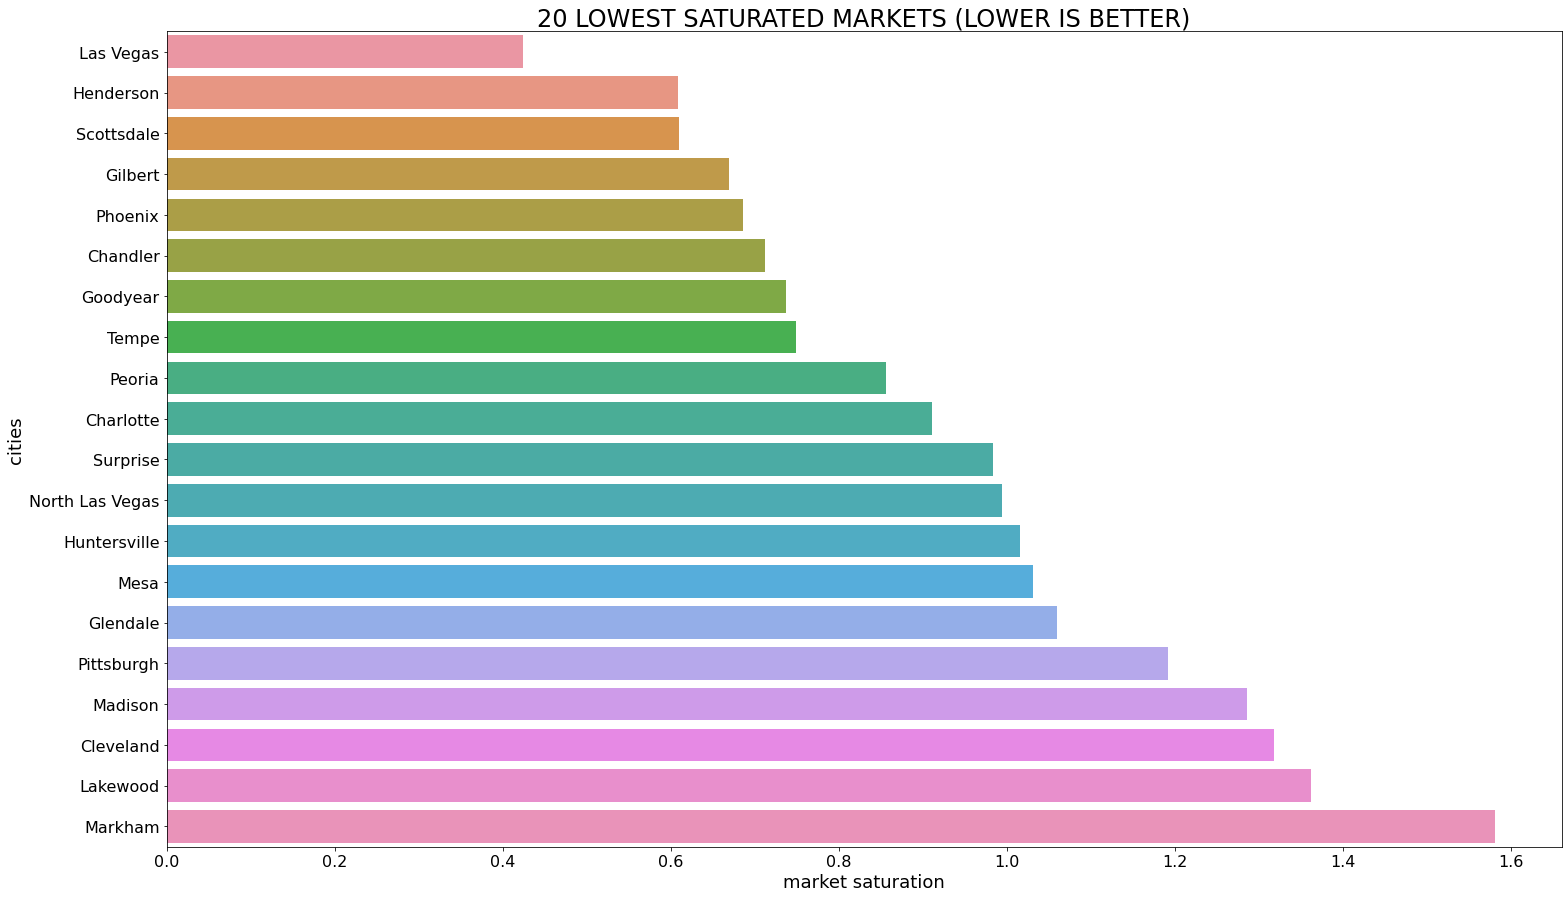

In [ ]:
#Collapse-show

#Visualization of the 20 lowest saturated markets
plt.figure(figsize= (25, 15))
plt.title('20 LOWEST SATURATED MARKETS (LOWER IS BETTER)', fontdict= {'fontsize': 24})
sns.barplot(df_dem_sup.market_saturation[:20], df_dem_sup.index[:20])
plt.ylabel('cities', fontdict= {'fontsize': 18})
plt.xlabel('market saturation', rotation= 0, fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('market_saturation.png')

From the above table, we can conclude that Las Vegas has the lowest saturated market with highest demand and supply compared to the other markets. It is interesting to see that Phoenix is among the top 5 lowest saturated markets, as they have a relatively high demand and medium supply. As we see an opportunity for a nightlife business to take advantage of this high demand and low saturated market, we are interested in assessing the nightlife of Phoenix. Thus, we want to slice and dice the data down to only including Phoenix businesses and their respective reviews.   

In [ ]:
#collapse-hide

#subsetting the dataframe to only Phoenix businesses
phoenix = df[(df.city == 'Phoenix')]
phoenix.head()

business_id              name     city state postal_code  \
8   Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ       85020   
9   Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ       85020   
10  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ       85020   
11  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ       85020   
12  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ       85020   

    stars  review_count  is_open  \
8     4.5            79        1   
9     4.5            79        1   
10    4.5            79        1   
11    4.5            79        1   
12    4.5            79        1   

                                           attributes  \
8   {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
9   {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
10  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
11  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
12  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                           categories                 user_id  \
8   Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
9   Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   
10  Bars, Arts & Entertainment, Nightlife, Music V...  E9IJMZ2njmG1LOMmOhzeBg   
11  Bars, Arts & Entertainment, Nightlife, Music V...  7KZhUr0i3K202Ux1-OGOhQ   
12  Bars, Arts & Entertainment, Nightlife, Music V...  UIKrJGEyTCWKaAvWDhLJug   

    review_stars                                               text  \
8              5  Our new favorite local spot. The owners are fa...   
9              5  Stopped in at Irene's after work.  This place ...   
10             5  Such a fun atmosphere!! Went there last night ...   
11             4  This place is new and very close to us, so we ...   
12             5  This is exactly what this neighborhood needed....   

                   date  experience  
8   2018-08-30 01:39:54           1  
9   2018-08-21 00:48:47           1  
10  2019-01-12 21:25:24           1  
11  2018-07-30 01:57:23           1  
12  2018-07-23 02:01:32           1

> Note: The new phoenix DataFrame has 211114 rows, and 15 columns. Only under the attributes column, we have 106 missing values.

In [ ]:
#hide
phoenix.shape

(211114, 15)

In [ ]:
#hide
phoenix.isnull().sum()

business_id       0
name              0
city              0
state             0
postal_code       7
stars             0
review_count      0
is_open           0
attributes      106
categories        0
user_id           0
review_stars      0
text              0
date              0
experience        0
dtype: int64

We save the DataFrame to a CSV file for use in the following task.

In [ ]:
#collapse-hide
name = 'data/phoenix_nightlife.csv'
phoenix.to_csv(name, index= False)


---
#Further Preprocessing
---


In this section, we aim to further preprocess our newest Phoenix nightlife dataframe. We want to ensure that our data leads to the best possible outcome, thus, the goal with preprocessing the data is to transform our mildly preprocessed raw data into a clean, usable and more meaningful data set. We start by importing the Yelp User dataset and merging it into our current Phoenix nightlife dataframe. In order to make our paper as valid and reliable as possible, we wish to exclude biases in our project by identifying and removing the customers that tend to be purely positive or negative. 

As online ratings are one of the most trusted sources of consumer confidence in commercial decisions, and users can easily influence the reviews written by others, it becomes relevant to consider the characteristics of the user. By the use of a statistical method for removing outliers, we intend to remove users with too little reviews, as they tend to have an extreme opinion when rating, and users with only 1 or 5 average star ratings.

#### Import of Data Sets

We import the User JSON in chunks and read our most recent Phoenix Nightlife data set

In [ ]:
#collapse-show
#import User JSON in chunks with a data sample of 1.000.000
path = 'data/yelp_academic_dataset_user.json'
size = 1000000
#Define dataframe and the datatypes of the column variables 
users = pd.read_json(path, lines= True,
                    dtype= {'user_id': str, 'name': str, 'review_count': int, 'yelping_since': str, 'friends': list, 
                            'useful': int, 'funny': int, 'cool': int, 'fans': int, 'elite': list, 'avarage_stars': float, 
                            'compliment_hot': int, 'comliment_more': int, 'compliment_profile': 42, 'compliment_cute': int,
                            'comliment_list': int, 'compliment_note': int, 'comliment_plain': int, 'compliment_cool': int, 
                            'compliment_funny': int, 'compliment_writer': int, 'compliment_photos': int},
                    chunksize= size)

#Read our current data set
phoenix = pd.read_csv('data/phoenix_nightlife.csv')
phoenix.head(3)

business_id              name     city state  postal_code  \
0  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ      85020.0   
1  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ      85020.0   
2  Mmd5WDFq9hHcQ3uClngGjQ  Irene's Tap Room  Phoenix    AZ      85020.0   

   stars  review_count  is_open  \
0    4.5            79        1   
1    4.5            79        1   
2    4.5            79        1   

                                          attributes  \
0  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
1  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
2  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
1  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   
2  Bars, Arts & Entertainment, Nightlife, Music V...  E9IJMZ2njmG1LOMmOhzeBg   

   review_stars                                               text  \
0             5  Our new favorite local spot. The owners are fa...   
1             5  Stopped in at Irene's after work.  This place ...   
2             5  Such a fun atmosphere!! Went there last night ...   

                  date  experience  
0  2018-08-30 01:39:54           1  
1  2018-08-21 00:48:47           1  
2  2019-01-12 21:25:24           1

#### Iterate through users and merge with phoenix data set

At this point, we want to iterate through the user data set and drop irrelevant columns to get a more accurate merging. Additionally, for the reader to better understand the review count columns which can occur inaccurate, we rename the column to "num_reviews_written". 

In [ ]:
#collapse-show

chunk_list = []

#iterate thorugh users
for chunk_user in users:

    #Drop irrelevant columns
    chunk_user = chunk_user.drop(['name', 'yelping_since', 'funny', 'cool', 'fans', 'elite', 'compliment_hot',
                                'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 
                                'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 
                                'compliment_writer', 'compliment_photos'], axis= 1)
    
    #Rename the review count column
    chunk_user = chunk_user.rename(columns= {'review_count': 'num_reviews_written'})

    #Merge the iteration of Users with Phoenix Nightlife dataset 
    chunk_merged = pd.merge(phoenix, chunk_user, on= 'user_id', how= 'inner')

    #Display the shape of the arrays
    print(f"{chunk_merged.shape[0]} out of {size:,} related users.")
    chunk_list.append(chunk_merged)

180426 out of 1,000,000 related users.
30688 out of 1,000,000 related users.


Now that we have the different dataframe 'pieces', we want to link them together into one data frame. This new dataframe with the relevant user information will be the foundation for removing outliers. 

In [ ]:
#collapse-hide

#Concatenate data frame "pieces" into one data frame.
phoenix_nightlife_user = pd.concat(chunk_list, ignore_index= True, join= 'outer', axis= 0)
phoenix_nightlife_user.head(3)

business_id                     name     city state  \
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  Phoenix    AZ   
2  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   

   postal_code  stars  review_count  is_open  \
0      85020.0    4.5            79        1   
1      85020.0    4.0           357        1   
2      85020.0    4.5            79        1   

                                          attributes  \
0  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
1  {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
2  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
1  Bars, Beer, Wine & Spirits, Sandwiches, Breakf...  3i095Fnh08yC-Q3VY0KeHQ   
2  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   

   review_stars                                               text  \
0             5  Our new favorite local spot. The owners are fa...   
1             5  This is our favorite local spot! The wings are...   
2             5  Stopped in at Irene's after work.  This place ...   

                  date  experience  num_reviews_written  useful  \
0  2018-08-30 01:39:54           1                    5       1   
1  2018-08-30 01:37:47           1                    5       1   
2  2018-08-21 00:48:47           1                   12       4   

                                             friends  average_stars  
0  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2  
1  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2  
2  p12DAvNJZ5szp8jP69NUbA, JdJ0b9QZKVrjv_nicDhABw...            5.0

>Note: Columns indicating number of reviews by the user, number of useful notes sent by the user, the users friends and the average star-ratings given by the users have been added to the dataframe. 

### Create experience column, based on review star.

In [ ]:
phoenix_nightlife_user = phoenix_nightlife_user.drop('experience', axis= 1)
phoenix_nightlife_user.shape

(211114, 18)

Positive experience = 1, Negative experience = 0

In [ ]:
mappings = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}
phoenix_nightlife_user['experience'] = phoenix_nightlife_user.review_stars.map(mappings)
phoenix_nightlife_user.experience.sample(5)

27665     1
90276     1
5348      1
131733    1
160394    0
Name: experience, dtype: int64

#### Visualize distribution of columns before removing outliers


Before removing the outliers for the users with purely extreme ratings, it is infromative to look at the current distribution of average star ratings by the user. What becomes evident is that we have a more "skewed right" distribution, which indicates that the majority of users that have rated the nightlife businesses in Phoenix tend to be more positively associated. Users tend to give 5 in average rating way more often than 1-2 ratings. 

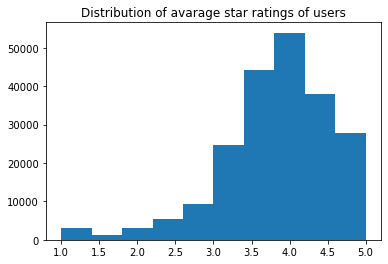

In [ ]:
#Collapse-show

#Plot a histogram of the given variable
plt.title('Distribution of avarage star ratings of users')
plt.hist(phoenix_nightlife_user.average_stars);

Secondly, looking at the distribution of number of reviews written by each user, we can see that approx. 100.000 users have written reviews less than 500 times, but we also still have above 50 users that have written more than 4000 reviews. 

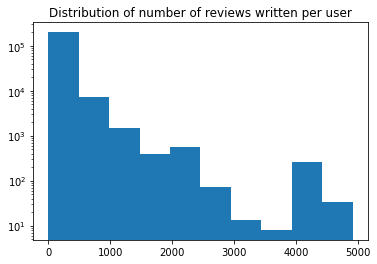

In [ ]:
#Collapse-show

#Plot a histogram of the given variable
plt.title('Distribution of number of reviews written per user')
plt.yscale('log')
plt.hist(phoenix_nightlife_user.num_reviews_written);

Finally, we can see from the distribution of number of reviews written for per business is highly "skewed left", indicating that the majority of businesses have received below approx 650 reviews, and only a few have received more than 2000 reviews. 

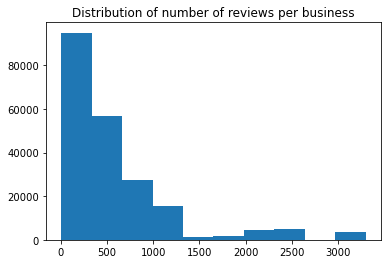

In [ ]:
#Collapse-show

#Plot a histogram of the given variable
plt.title('Distribution of number of reviews per business')
plt.hist(phoenix_nightlife_user.review_count);

### Remove outliers

IQR = 75th percentile - 25th percentile (Q3 - Q1).
Outlier (left tail) =  25th percentile - IQR * 1.5.
Outlier (right tail) = 75th percentile + IQR * 1.5.

Calculate IQR for the columns we intend to "clean".

In [ ]:
IQR_stars = phoenix_nightlife_user.average_stars.quantile(0.75) - phoenix_nightlife_user.average_stars.quantile(0.25)
IQR_num_rev_wri = phoenix_nightlife_user.num_reviews_written.quantile(0.75) - phoenix_nightlife_user.num_reviews_written.quantile(0.25)
IQR_rev_count = phoenix_nightlife_user.review_count.quantile(0.75) - phoenix_nightlife_user.review_count.quantile(0.25)

Calculate thresholds for 3 variables to classify outliers.

In [ ]:
outlier_stars = IQR_stars * 1.5
outlier_num_rev_wri = IQR_num_rev_wri * 1.5
outlier_rev_count = IQR_rev_count * 1.5

Calculate Q1 and Q3 for 3 variables

In [ ]:
Q1_stars = phoenix_nightlife_user.average_stars.quantile(0.25)
Q3_stars = phoenix_nightlife_user.average_stars.quantile(0.75)

Q1_num = phoenix_nightlife_user.num_reviews_written.quantile(0.25)
Q3_num = phoenix_nightlife_user.num_reviews_written.quantile(0.75)

Q1_rev = phoenix_nightlife_user.review_count.quantile(0.25)
Q3_rev = phoenix_nightlife_user.review_count.quantile(0.75)

#### Create final data set, that contains businesses in Phoenix and their respective reviews, along with useful information about the user who gave said review. "Outliers"  are removed from data set.

In [ ]:
phoenix_nightlife_user = phoenix_nightlife_user[(phoenix_nightlife_user.average_stars >= Q1_stars - outlier_stars) | 
                                                (phoenix_nightlife_user.average_stars <= Q3_stars + outlier_stars) & 
                                                (phoenix_nightlife_user.num_reviews_written >= Q1_num - outlier_num_rev_wri) |
                                                (phoenix_nightlife_user.num_reviews_written <= Q3_num + outlier_num_rev_wri) &
                                                (phoenix_nightlife_user.review_count >= Q1_rev - outlier_rev_count) |
                                                (phoenix_nightlife_user.review_count <= Q3_rev + outlier_rev_count)]

In [ ]:
phoenix_nightlife_user.shape

(211114, 19)

In [ ]:
name = 'data/phoenix_users.csv'
phoenix_nightlife_user.to_csv(name, index= False)

#### Visualize distribution of columns after removing outliers

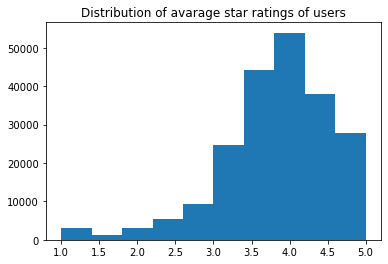

In [ ]:
plt.title('Distribution of avarage star ratings of users')
plt.hist(phoenix_nightlife_user.average_stars);

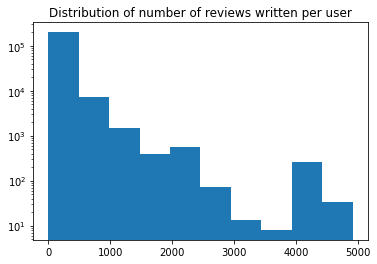

In [ ]:
plt.title('Distribution of number of reviews written per user')
plt.yscale('log')
plt.hist(phoenix_nightlife_user.num_reviews_written);

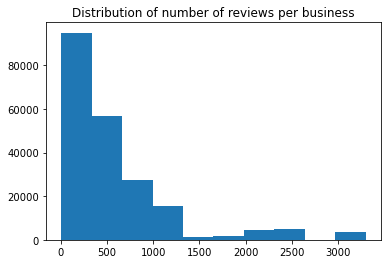

In [ ]:
plt.title('Distribution of number of reviews per business')
plt.hist(phoenix_nightlife_user.review_count);

---
#Analysis
---


##EDA - Exploratory Data Analysis

After the preprocessing of the data, we want to further explore the data and get a notion of the cahracteristics of the nightlife in Phoenix


###Load DataFrame

In [ ]:
#collapse-hide

#Read the current dataframe
path_phoenix_nightlife = '/content/drive/MyDrive/DSBA_Project/yelp_dataset/phoenix_nightlife.csv'
phoenix_nightlife = pd.read_csv(path_phoenix_nightlife)
phoenix_nightlife.head()

business_id                     name  ... average_stars experience
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  ...           4.2          1
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  ...           4.2          1
2  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  ...           5.0          1
3  0859wfd1BQHG46Zpwhc0ZQ              Oven + Vine  ...           5.0          1
4  PQicuLOZ3uNJKn4PtayjlQ              Shake Shack  ...           5.0          1

[5 rows x 19 columns]

In [ ]:
#hide
len(phoenix_nightlife)

211114

---
### Businesses with the highest and lowest average score

We start of by getting an overview of the top positive and negative ratings for the nightlife businesses in Phoenix

---

In [ ]:
#collapse-show

#We group the relevant columns and sort the values based on stars and review count.
star_rating = phoenix_nightlife.groupby(['business_id', 'name', 'city', 'review_count'])['stars'].mean()
star_rating = pd.DataFrame(star_rating).sort_values(by=['stars', 'review_count'], ascending = [False, False])
star_rating.reset_index(inplace=True)
star_rating

business_id                      name  ... review_count  stars
0     Xg5qEQiB-7L6kGJ5F4K3bQ           Little Miss BBQ  ...         2329    5.0
1     zJ__js7-Cx_wU4GhdBdeRA  The Refuge Coffee & Wine  ...          163    5.0
2     eZqoDfBg-xOS8WdcZCYM2A             JL Smokehouse  ...          146    5.0
3     O4kYogia0fbF85pCX10XiA        Koi Poke - Arcadia  ...          144    5.0
4     fHKvkiSHuUYM10Z7KqBrbQ      ILLEET Entertainment  ...          124    5.0
...                      ...                       ...  ...          ...    ...
1587  ZhLDShf9HUHM6wr318fcog        Spirit Expeditions  ...            7    1.0
1588  Oajq77cR9YXbYJT3l2c74Q      Empire Beauty School  ...            5    1.0
1589  YQvqlA-klSRHKVxQc1_4Ew     Callahans Bar & Grill  ...            5    1.0
1590  z0ztEHnv9YLFsZ8KEN7LKA  Liquid Velvet Smoke Shop  ...            4    1.0
1591  yvFSKXYIey7H9WdcHig2cA       Silverado Canta Bar  ...            3    1.0

[1592 rows x 5 columns]

In the above table, we get an overview of the higest and lowest rated businesses and their resepctive review counts. In order to make our analysis more valid, we only want to consider businesses with above 1000 reviews for assessing the top rated businesses. It is very likely that a businesses with 5 stars rating and the highest amount of reviews are favoured by more visitors compared to a business with 5 star rating and relatively low amount of review counts. 

Likewise, when assessing the worst performing businesses, we only want to consider the businesses with above 100 review counts. These businesses are constantly getting bad ratings compared to businesses with bad ratings, however, also low review counts. 

By filtering out in such a way, we are able to select the businesses that are constantly performing at the higest and lowest level, which will give the foundation for building the perfect business concept in Phoenix. Below, we get an overview of the businesses with highest ratings and reviews above 1000 and now we have new businesses on 2nd, 3rd, 4th and 5th best performing businesses while the 1st remains as Little Miss BBQ.

In [ ]:
#Collapse-hide

#Filter out the businesses with review_count below 1000
star_rating_skimmed = star_rating[star_rating.review_count >= 1000]
star_rating_skimmed

business_id  ... stars
0    Xg5qEQiB-7L6kGJ5F4K3bQ  ...   5.0
121  VyVIneSU7XAWgMBllI6LnQ  ...   4.5
122  S-oLPRdhlyL5HAknBKTUcQ  ...   4.5
123  u-SJ5QUwrNquL9VnXwl8cg  ...   4.5
124  ZCzey5aPhd7jYIoHsUfjmQ  ...   4.5
125  ukCTLs6T8LY1eUBXiAlmCg  ...   4.5
126  FogTa-wmjhVnJCoTiaxvZA  ...   4.5
127  cTZmf7B-4yciMc1WKiCVOA  ...   4.5
430  yNPh5SO-7wr8HPpVCDPbXQ  ...   4.0
431  OgJ0KxwJcJ9R5bUK0ixCbg  ...   4.0
432  frCxZS7lPhEnQRJ3UY6m7A  ...   4.0
433  3C5Z9homtzkWHouH2BHXYQ  ...   4.0
434  J07TDs6qnTIaxm48EL1cKQ  ...   4.0
435  cTJjTKz2huGZ-ElScC2pSw  ...   4.0
436  Gz9SlLqxS6wnxPvgdOQNrA  ...   4.0
437  plWuv4gda7m0KlqCNhrb4w  ...   4.0
438  fT6Uwl6abRQfiNgxre_qbg  ...   4.0
439  NJ0RzuWd5xDqfJejYQZ65g  ...   4.0
440  LHyj66waFlDcw9UToo27JQ  ...   4.0
441  PVTfzxu7of57zo1jZwEzkg  ...   4.0

[20 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


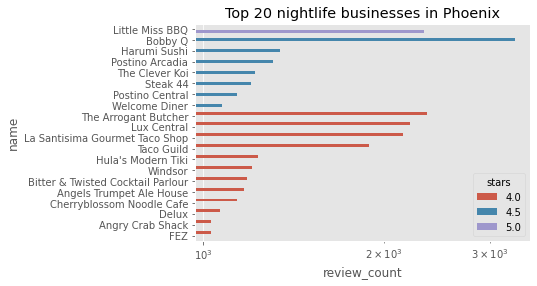

In [ ]:
#Collapse-show

#Visualization of the Top 20 Nightlife businesses in Phoenix with above 1000 reviews
sns.barplot(star_rating_skimmed.review_count[:20], star_rating_skimmed.name[:20], ci=None, hue=star_rating_skimmed.stars[:20]);
plt.title('Top 20 nightlife businesses in Phoenix')

plt.xscale('log')

After knowing the best performing businesses in hte nightlife of Phoenix, we now get and overview of the worst performing with review counts above 100. Here, we can see that Hooters is the business with lowest ratings.

In [ ]:
#Collapse-hide

#Filter out the businesses with review_count below 100
star_rating_skimmed = star_rating[star_rating.review_count >= 100]
star_rating_skimmed = pd.DataFrame(star_rating_skimmed).sort_values(by=['stars', 'review_count'], ascending = [True, False])
star_rating_skimmed.head(20)

business_id  ... stars
1530  k4qx8DacgRbM9vpVbWc3zA  ...   2.0
1531  5xCeuEI7Einoi5xYsNuDCQ  ...   2.0
1532  -0WegMt6Cy966qlDKhu6jA  ...   2.0
1533  U6eg7zI-0TosgVvmrOtlZg  ...   2.0
1534  YZeUH6zYS0dq5QHLYZhUnQ  ...   2.0
1421  YlwJYpBWa-oL0byTVPNKRQ  ...   2.5
1422  W7Dt3b6H_pMIHfxn49Pkzg  ...   2.5
1423  wERcL1KznuTgfltSKQt_jg  ...   2.5
1424  HTaA1mo9cB1dXMwfJC6yKg  ...   2.5
1425  6FO2DTcN7zqFfl090zf12g  ...   2.5
1426  wJ84TZZTuT0EdLzPHt8RDw  ...   2.5
1427  JRo3APL5f4-TEkuI-SoDcA  ...   2.5
1428  EE_CKAAq7_oL7jfxmUKhuw  ...   2.5
1429  H1Mp8I2YuyBe8lFHnRk3iA  ...   2.5
1430  UX8xcfHhnRbgmUK1kXLYrQ  ...   2.5
1431  kacZeom987POja3RwNUJpA  ...   2.5
1432  0h5yI6np7weAVH0jsjHqPw  ...   2.5
1433  JlMYSLiLnpWiihmzZkQS-w  ...   2.5
1434  m3tNor-GTl-aAST5AmEqYA  ...   2.5
1435  HVzH8CO3e1-tjr97cF_8LA  ...   2.5

[20 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


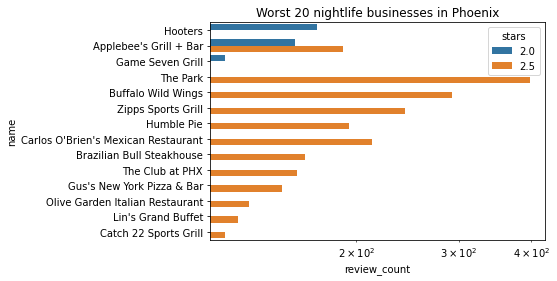

In [ ]:
#collapse-show

#Visualization of the 20 worst performing nightlife businesses in Phoenix
sns.barplot(star_rating_skimmed.review_count[:20], star_rating_skimmed.name[:20], ci=None, hue=star_rating_skimmed.stars[:20]);
plt.title('Worst 20 nightlife businesses in Phoenix')

plt.xscale('log')

##### Conclusion

We can conclude from the above two barplots that 'Little Miss BBQ' has a significant review count, and still maintains to keep an average star rate at 5. On the contrary, one of the lowest performing entities which is interesting to look at is 'Hooters' with a review count above 200, but remains as the worst performing business. These two companies will be used as case studies in the review insights chapter. 

In the tabular tablefor worst performing businesses, Applebee's Grill + Bar shows up multiple times and these represent multiple entities in Phoenix, as these all have different business IDs. 



---


###Most popular categories of nightlife in Phoenix

In this section, we want to explore which business concepts are the most popular in the nightlife of Phoenix

---

In order to do this, we split the category column containing the various categories which a business belongs under into several rows. Now, the businesses occur in several rows with the respective category. In this way, we can count how mny reviews fall under each category. See below example with Spoke & Wheel:

In [ ]:
#Collapse-show

#Split the categories column into rows by exploding evey element in the categories column
phoenix_top_cat = phoenix_nightlife.assign(categories = phoenix_nightlife.categories.str.split(', ')).explode('categories')
phoenix_top_cat = phoenix_top_cat[(phoenix_top_cat.categories != 'Bars') & (phoenix_top_cat.categories != 'Nightlife')]
phoenix_top_cat.head()

business_id                     name  ... average_stars experience
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  ...           4.2          1
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  ...           4.2          1
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  ...           4.2          1
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  ...           4.2          1
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  ...           4.2          1

[5 rows x 19 columns]

In [ ]:
#hide
len(phoenix_top_cat)

1421588

The length of the DataFrame went from approx. 211K to 1,4 Million. Now, we only want businesses with above or equal to 10 reviews as....

In [ ]:
#collapse-hide

#Filter out the businesses with equal or above 10 rviews
phoenix_weight = phoenix_top_cat[phoenix_top_cat.review_count >= 10]

print('The top 10 categories in Nightlife of Phoenix:')
phoenix_weight.categories.value_counts()[:10]

The top 10 categories in Nightlife of Phoenix:


Restaurants               184396
American (New)             60183
Food                       58267
American (Traditional)     46970
Breakfast & Brunch         37741
Cocktail Bars              29090
Barbeque                   25165
Wine Bars                  24329
Sushi Bars                 24198
Burgers                    23502
Name: categories, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


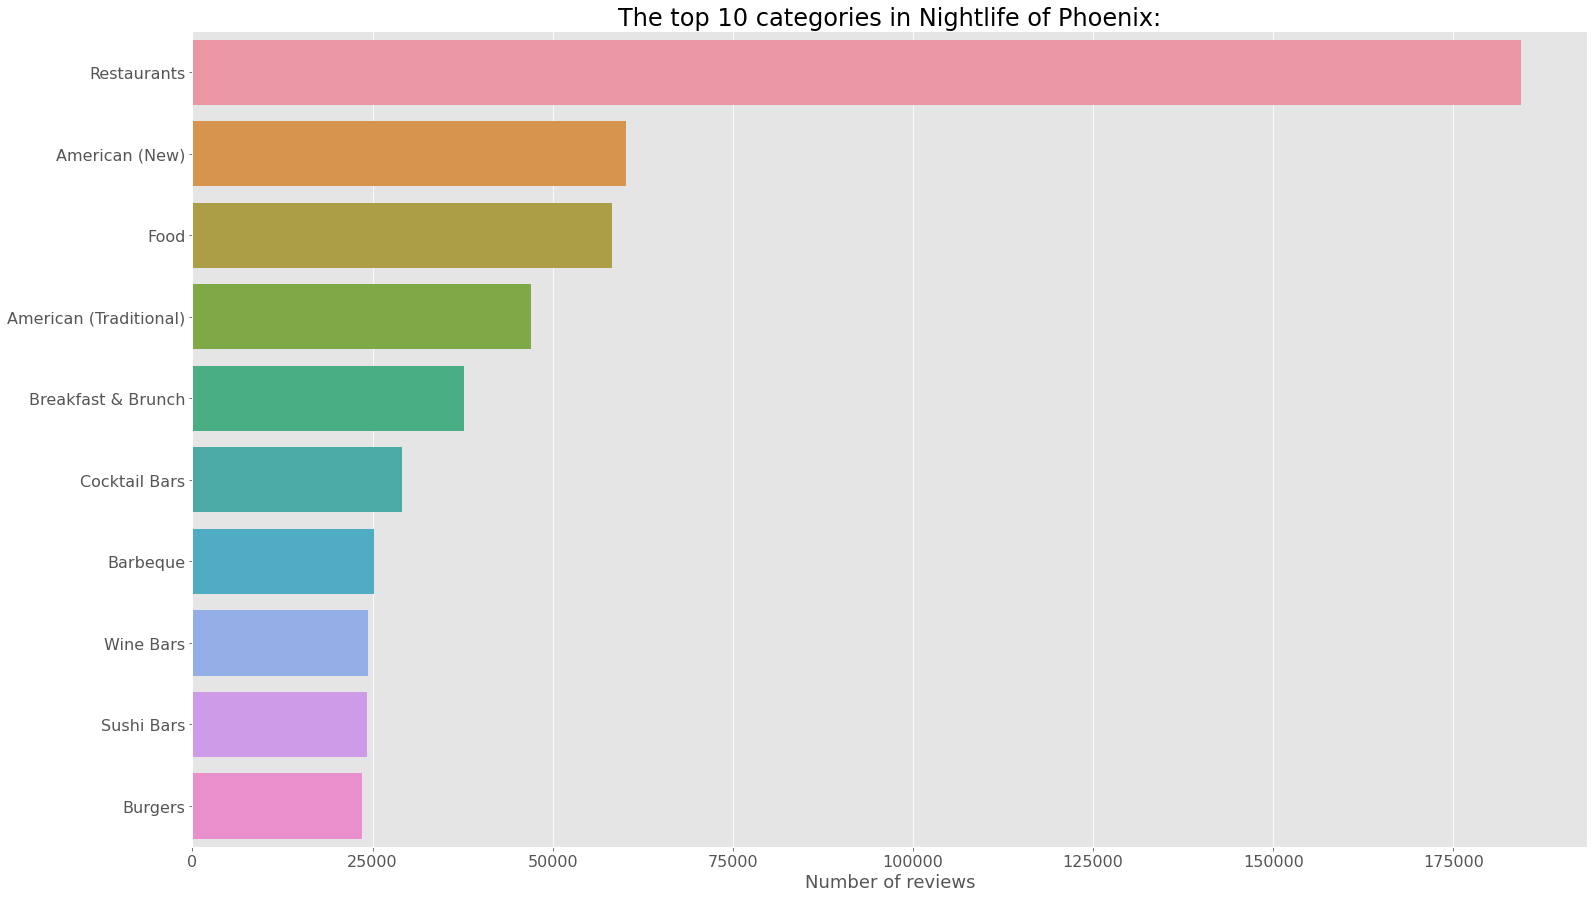

In [ ]:
#Collapse-show

#Visualization of the top 10 categories in nightlife of Phoenix
Visualization = phoenix_weight.categories.value_counts()[:10]
viz = pd.DataFrame(Visualization)

plt.figure(figsize= (25, 15))
plt.style.use('ggplot')
sns.barplot(viz.categories, viz.index)
plt.title('The top 10 categories in Nightlife of Phoenix:', fontdict= {'fontsize': 24})
plt.xlabel('Number of reviews', fontdict= {'fontsize': 18})
plt.tick_params(labelsize= 16)
plt.savefig('categories_nightlife.png')

####Conclusion
From the above table, we can conclude that 'Restaurants' is the most popular business concept that has been reviewed, specifically American (new) themed restaurants. Secondly, bars score highly, specifically cocktail bars are popular in Phoenix.

### Assessing if experience has a significant effect on whether or not a business stays open

So how important are reviews for a business in Phoenix? Does it define whether a business will remain open or not? With these questions in mind, we want to test the probability that a business is closed based on experience.

In [ ]:
#Collapse-hide

#The percentage of how many businesses are open and closed
phoenix_weight.is_open.value_counts(normalize= True)

1    0.867187
0    0.132813
Name: is_open, dtype: float64

In [ ]:
#collapse-show

#Generate a table that shows the correlation of is_open and experience
pd.crosstab(phoenix_weight.is_open, phoenix_weight.experience, normalize= True)

experience         0         1
is_open                       
0           0.045571  0.087242
1           0.246586  0.620601

####Conclusion
We want to compute a simple cross tabulation of the two factors, If a business is open and the overall experience. The return is a frequency table and here we can see that there is a significant proportion of positive experience for the businesses that closed down, compared to the negative experiences. Thus, there is a no correlation between the experience and whether the business stays open or not. 

##Review Insights

### Positive experience

This section inspects the reviews that belong to the subgroup of phoenix businesses that have an avarage rating  higher than or equal to 4 stars.

#### Read in Data

We use both kinds of vectorizer that sklearn offers and apply the SVD algorithm to both document term matrices to see if the outcome is similiar. We expect that the outcomes will be identical.

In [ ]:
#collapse-hide

phoenix = pd.read_csv('data/phoenix_users.csv')
phoenix_pos = phoenix[phoenix.experience == 1]
phoenix_pos.head(3)

business_id                     name     city state  \
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  Phoenix    AZ   
2  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   

   postal_code  stars  review_count  is_open  \
0      85020.0    4.5            79        1   
1      85020.0    4.0           357        1   
2      85020.0    4.5            79        1   

                                          attributes  \
0  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
1  {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
2  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
1  Bars, Beer, Wine & Spirits, Sandwiches, Breakf...  3i095Fnh08yC-Q3VY0KeHQ   
2  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   

   review_stars                                               text  \
0             5  Our new favorite local spot. The owners are fa...   
1             5  This is our favorite local spot! The wings are...   
2             5  Stopped in at Irene's after work.  This place ...   

                  date  num_reviews_written  useful  \
0  2018-08-30 01:39:54                    5       1   
1  2018-08-30 01:37:47                    5       1   
2  2018-08-21 00:48:47                   12       4   

                                             friends  average_stars  \
0  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
1  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
2  p12DAvNJZ5szp8jP69NUbA, JdJ0b9QZKVrjv_nicDhABw...            5.0   

   experience  
0           1  
1           1  
2           1

In [ ]:
#hide
phoenix_pos.shape

(148737, 19)

*Pick n = 5000 random sample, to save memory.* Simple Random Sample assumption (a sufficient random! sample can be representative of the population that it is taken from).

In [ ]:
#collapse-hide
text = phoenix_pos.text.sample(5000, random_state= 42)

#### Create bag-of-words (discrete) representation of reviews

We create the document term matrix here, that we will decompose later with the intent to find dependencies in it.

In [ ]:
#collapse-hide
c_vectorizer = TfidfVectorizer(stop_words= 'english')
dtm_c = c_vectorizer.fit_transform(text).toarray()
vocab_c = np.array(c_vectorizer.get_feature_names())

tf_vectorizer = CountVectorizer(stop_words= 'english')
dtm_t = tf_vectorizer.fit_transform(text).todense()
vocab_t = np.array(tf_vectorizer.get_feature_names())

# Check shape of document term matrix
print(f'The shape of the document term matrix is : {dtm_c.shape} and the number of tokens in the vocabulary is : {len(vocab_c)}.')
dtm_c.shape == dtm_t.shape

The shape of the document term matrix is : (5000, 14689) and the number of tokens in the vocabulary is : 14689.


True

We use a simple helper function to help extract the top words from the "abstract" topics.

In [ ]:
#collapse-hide

# helper function
def show_topics(V, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in V])
    return [' '.join(x) for x in topic_words]

#### Singular Value Decomposition (randomized in order to enhance speed)

This is a low rank approximation algorithm (we try to "recreate" the column space of our original matrix with a smaller matrix) and we compute a full svd on the smaller matrix.

In [ ]:
#collapse-hide

d = 5 # number of topics
num_top_words = 10 # number of top words

U_c, s_c, Vh_c = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

U_t, s_t, Vh_t = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

Topics from the document term matrix by CountVectorizer.

In [ ]:
#collapse-hide

show_topics(Vh_c, vocab_c)

['great food place good service love time amazing best friendly',
 'great food service atmosphere awesome amazing recommend drinks love place',
 'sushi hour happy roll rolls fresh rice love price fish',
 'service bbq food amazing brisket ribs delicious pork excellent best',
 'love place best bbq friendly staff coffee amazing brisket ve']

Topics from the document term matrix by TfidfVectorizer.

In [ ]:
#collapse-hide
show_topics(Vh_t, vocab_t)

['great food place good service love time amazing best friendly',
 'great food service atmosphere awesome amazing recommend drinks love place',
 'sushi hour happy roll rolls fresh rice love price fish',
 'service bbq food amazing brisket ribs delicious pork excellent best',
 'love place best bbq friendly staff coffee amazing brisket ve']

#### Save top words into CSV

As they both produced the same outcome, we only save one list.
We will import this list later when we create a visual summary of this finding.

In [ ]:
#collapse-hide
positive_top_topics = show_topics(Vh_t, vocab_t)

name = 'data/positive_top_words.csv'
pd.Series(positive_top_topics).to_csv(name, index= False)

### Negative experience

This section inspects the reviews that belong to the subgroup of phoenix businesses that have an avarage rating  smaller than or equal to 3.5 stars.

#### Read in data

We use both kinds of vectorizer that sklearn offers and apply the SVD algorithm to both document term matrices to see if the outcome is similiar. We expect that the outcomes will be identical.

In [ ]:
#collapse-hide
phoenix = pd.read_csv('data/phoenix_users.csv')
phoenix_neg = phoenix[phoenix.experience == 0]
phoenix_neg.head(3)

business_id                                 name     city  \
7   AueEbb9kao4lt6CYt06hqw           Okra Cookhouse & Cocktails  Phoenix   
9   YM-nYIHd99qUt9n62AxIAg  Carlos O'Brien's Mexican Restaurant  Phoenix   
15  042IHd5KjHiMuBtGtugO_g       OHSO Brewery - Paradise Valley  Phoenix   

   state  postal_code  stars  review_count  is_open  \
7     AZ      85014.0    4.0           227        0   
9     AZ      85020.0    3.5           284        1   
15    AZ      85028.0    4.0           719        1   

                                           attributes  \
7   {'Music': "{'dj': False}", 'RestaurantsDeliver...   
9   {'GoodForKids': 'True', 'RestaurantsGoodForGro...   
15  {'GoodForKids': 'True', 'HasTV': 'True', 'Cate...   

                                           categories                 user_id  \
7   Italian, Restaurants, Nightlife, American (New...  7KZhUr0i3K202Ux1-OGOhQ   
9   Restaurants, Mexican, Salad, Bars, Nightlife, ...  7KZhUr0i3K202Ux1-OGOhQ   
15  Nightlife, Burgers, Gluten-Free, Bars, Breakfa...  7KZhUr0i3K202Ux1-OGOhQ   

    review_stars                                               text  \
7              2  Good things: service was excellent and locatio...   
9              1  Sorry, but the food here is terrible and overp...   
15             3  I was so excited about this place opening, and...   

                   date  num_reviews_written  useful  \
7   2016-01-26 00:08:15                   69      90   
9   2018-05-16 23:05:59                   69      90   
15  2015-03-27 19:25:31                   69      90   

                                              friends  average_stars  \
7   TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...           3.64   
9   TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...           3.64   
15  TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...           3.64   

    experience  
7            0  
9            0  
15           0

In [ ]:
#hide
phoenix_neg.shape

(62377, 19)

*Pick n = 5000 random sample, to save memory.* Simple Random Sample assumption (a sufficient random! sample can be representative of the population that it is taken from).

In [ ]:
#collapse-hide
text = phoenix_neg.text.sample(5000, random_state= 42)

#### Create bag-of-words (discrete) representation of reviews

We create the document term matrix here, that we will decompose later with the intent to find dependencies in it.

In [ ]:
#collapse-hide
c_vectorizer = TfidfVectorizer(stop_words= 'english')
dtm_c = c_vectorizer.fit_transform(text).toarray()
vocab_c = np.array(c_vectorizer.get_feature_names())

tf_vectorizer = CountVectorizer(stop_words= 'english')
dtm_t = tf_vectorizer.fit_transform(text).todense()
vocab_t = np.array(tf_vectorizer.get_feature_names())

# Check shape of document term matrix
print(f'The shape of the document term matrix is : {dtm_c.shape} and the number of tokens in the vocabulary is : {len(vocab_c)}.')
dtm_c.shape == dtm_t.shape

The shape of the document term matrix is : (5000, 16930) and the number of tokens in the vocabulary is : 16930.


True

We use the same helper function that we used above to extract the top words.

In [ ]:
#collapse-hide
# helper function
def show_topics(V, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in V])
    return [' '.join(x) for x in topic_words]

#### Singular Value Decomposition (randomized in order to enhance speed)

This is a low rank approximation algorithm (we try to "recreate" the column space of our original matrix with a smaller matrix) and we compute a full svd on the smaller matrix.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words

U_c, s_c, Vh_c = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

U_t, s_t, Vh_t = utils.extmath.randomized_svd(dtm_c, d, random_state= 42)

Topics from the document term matrix created by CountVectorizer

In [ ]:
#collapse-hide
show_topics(Vh_c, vocab_c)

['food good place service just like time order great ordered',
 'minutes waited order table asked said manager took told service',
 'place bar service sushi great food good beer staff music',
 'sushi roll rolls fish rice tuna fresh order ramen california',
 'food service good slow great cold minutes took waited terrible']

Topics from the document term matrix created by TfidfVectorizer

In [ ]:
#collapse-hide
show_topics(Vh_t, vocab_t)

['food good place service just like time order great ordered',
 'minutes waited order table asked said manager took told service',
 'place bar service sushi great food good beer staff music',
 'sushi roll rolls fish rice tuna fresh order ramen california',
 'food service good slow great cold minutes took waited terrible']

#### Save top words into CSV

As they both produced the same outcome, we only save one list.
We save it, so that later we can visualize the conclusion.

In [ ]:
#collapse-hide
negative_top_topics = show_topics(Vh_t, vocab_t)

name = 'data/negative_top_words.csv'
pd.Series(negative_top_topics).to_csv(name, index= False)

### 1-5 stars

In this section, we look into the differences of the businesses of the different "levels" of ratings that they achieved.

We use the TfidfVectorizer and apply the NMF algorithm to the document term matrix. Create a different document term matrix for each review stars to see if we can "pick up" some differences among the different reviews.

#### Read in data set

In [ ]:
#collapse-hide
phoenix = pd.read_csv('data/phoenix_users.csv')
phoenix_1 = phoenix[phoenix.review_stars == 1]
phoenix_2 = phoenix[phoenix.review_stars == 2]
phoenix_3 = phoenix[phoenix.review_stars == 3]
phoenix_4 = phoenix[phoenix.review_stars == 4]
phoenix_5 = phoenix[phoenix.review_stars == 5]

phoenix_1.head(3)

business_id                                 name     city  \
9   YM-nYIHd99qUt9n62AxIAg  Carlos O'Brien's Mexican Restaurant  Phoenix   
44  BOD0yRkakyxXzJmbVVAxSA                          Camp Social  Phoenix   
61  Mmd5WDFq9hHcQ3uClngGjQ                     Irene's Tap Room  Phoenix   

   state  postal_code  stars  review_count  is_open  \
9     AZ      85020.0    3.5           284        1   
44    AZ      85014.0    3.5           636        0   
61    AZ      85020.0    4.5            79        1   

                                           attributes  \
9   {'GoodForKids': 'True', 'RestaurantsGoodForGro...   
44  {'BikeParking': 'True', 'RestaurantsTakeOut': ...   
61  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                           categories                 user_id  \
9   Restaurants, Mexican, Salad, Bars, Nightlife, ...  7KZhUr0i3K202Ux1-OGOhQ   
44  Restaurants, Bars, Nightlife, American (Tradit...  osIsgYzdCKDvEv0ddrrzMw   
61  Bars, Arts & Entertainment, Nightlife, Music V...  Zs6AfhzLlQ-YzWrVWr8-bA   

    review_stars                                               text  \
9              1  Sorry, but the food here is terrible and overp...   
44             1  Came back on Friday night and noticed signific...   
61             1  Chemical spill! I had just paid $12 for a $9 7...   

                   date  num_reviews_written  useful  \
9   2018-05-16 23:05:59                   69      90   
44  2017-07-10 16:16:14                   13       4   
61  2019-05-14 04:43:48                   35      33   

                                              friends  average_stars  \
9   TBALUD-0FdJ6oGPqyCM8tQ, 6j_nmp1O3blJhCRDGQ5UvQ...           3.64   
44  OvxcsyUSl9d0mXweVBqRAQ, bCgVzrbeVe6zM_p_X7e-mA...           2.60   
61                                               None           2.86   

    experience  
9            0  
44           0  
61           0

*Pick n = 5000 random sample, to save memory.* Simple Random Sample assumption.

In [ ]:
#collapse-hide
text_1 = phoenix_1.text.sample(5000, random_state= 42)
text_2 = phoenix_2.text.sample(5000, random_state= 42)
text_3 = phoenix_3.text.sample(5000, random_state= 42)
text_4 = phoenix_4.text.sample(5000, random_state= 42)
text_5 = phoenix_5.text.sample(5000, random_state= 42)

#### Create bag-of-words (discrete) representation of reviews

We create the document term matrices here for the different "subgroups".

In [ ]:
#collapse-hide
vectorizer1 = TfidfVectorizer(stop_words= 'english')
dtm_1 = vectorizer1.fit_transform(text_1).toarray()
vocab_1 = np.array(vectorizer1.get_feature_names())

vectorizer2 = TfidfVectorizer(stop_words= 'english')
dtm_2 = vectorizer2.fit_transform(text_2).toarray()
vocab_2 = np.array(vectorizer2.get_feature_names())

vectorizer3 = TfidfVectorizer(stop_words= 'english')
dtm_3 = vectorizer3.fit_transform(text_3).toarray()
vocab_3 = np.array(vectorizer3.get_feature_names())

vectorizer4 = TfidfVectorizer(stop_words= 'english')
dtm_4 = vectorizer4.fit_transform(text_4).toarray()
vocab_4 = np.array(vectorizer4.get_feature_names())

vectorizer5 = TfidfVectorizer(stop_words= 'english')
dtm_5 = vectorizer5.fit_transform(text_5).toarray()
vocab_5 = np.array(vectorizer5.get_feature_names())

In [ ]:
#hide

# Check shape of document-term matrices
dtm_1.shape, dtm_2.shape, dtm_3.shape, dtm_4.shape, dtm_5.shape

((5000, 16345), (5000, 16849), (5000, 16668), (5000, 16063), (5000, 13849))

In [ ]:
#hide

# Check length of vocabularies
len(vocab_1), len(vocab_2), len(vocab_3), len(vocab_4), len(vocab_5)

(16345, 16849, 16668, 16063, 13849)

Again, we use the helper function to extract the top 10 words from the topics.

In [ ]:
#collapse-hide

# helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

#### Non-negative Matrix Factorization

This is not an exact decomposition, and a fairly new technique. Researchers have been working hard for decades to create this algorithm. We used sklearn's implementation (other ones exist too).

In [ ]:
#collapse-hide

d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf_1 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_1 = nnmf_1.fit_transform(dtm_1)
H_1 = nnmf_1.components_

nnmf_2 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_2 = nnmf_2.fit_transform(dtm_2)
H_2 = nnmf_2.components_

nnmf_3 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_3 = nnmf_3.fit_transform(dtm_3)
H_3 = nnmf_3.components_

nnmf_4 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_4 = nnmf_4.fit_transform(dtm_4)
H_4 = nnmf_4.components_

nnmf_5 = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W_5 = nnmf_5.fit_transform(dtm_5)
H_5 = nnmf_5.components_

Topics from 1 star reviews

In [ ]:
#collapse-hide
show_topics(H_1, vocab_1)

['minutes order table came waited server asked 10 got seated',
 'chicken ordered food like sushi good salad sauce tasted cheese',
 'bar place people just don like bartender rude time said',
 'service food horrible terrible worst place bad customer good time',
 'hair cut haircut barber shop time cutting barbers fade didn']

Topics from 2 star reviews

In [ ]:
#collapse-hide
show_topics(H_2, vocab_2)

['minutes order table server came took asked time waitress got',
 'chicken cheese ordered sauce bbq salad good fries sandwich burger',
 'place bar like just really beer don people nice drinks',
 'sushi roll rolls fish rice fresh quality happy hour sashimi',
 'food service good slow great restaurant times horrible bad poor']

Topics from 3 star reviews

In [ ]:
#collapse-hide
show_topics(H_3, vocab_3)

['bar place beer like drinks happy hour nice music drink',
 'chicken cheese good sauce burger bbq fries sandwich salad ordered',
 'sushi roll rolls hour happy spicy rice fish tuna fresh',
 'time minutes order table server came took didn asked got',
 'food service good great ok atmosphere place really average slow']

Topics from 4 star reviews

In [ ]:
#collapse-hide
show_topics(H_4, vocab_4)

['place bar like beer night cool really fun music just',
 'good chicken ordered burger cheese salad really bbq fries got',
 'sushi roll rolls fresh place lunch tempura sashimi tuna spicy',
 'great food good service atmosphere friendly staff place nice drinks',
 'happy hour wings menu drinks great appetizers deals specials awesome']

Topics from 5 star reviews

In [ ]:
#collapse-hide
show_topics(H_5, vocab_5)

['love place bar friendly fun drinks staff favorite beer phoenix',
 'good delicious really time ordered got definitely food like came',
 'sushi roll hour happy rolls fresh good place prices best',
 'great food service atmosphere excellent awesome recommend staff amazing friendly',
 'bbq best brisket ve ribs pork amazing pulled wait worth']

#### Save top words into CSVs

We save the topic words into CSVs, that we later import to create word clouds.

In [ ]:
#collapse-hide
one_top_topics = show_topics(H_1, vocab_1)
two_top_topics = show_topics(H_2, vocab_2)
three_top_topics = show_topics(H_3, vocab_3)
four_top_topics = show_topics(H_4, vocab_4)
five_top_topics = show_topics(H_5, vocab_5)


name1 = 'data/one_top_words.csv'
pd.Series(one_top_topics).to_csv(name1, index= False)

name2 = 'data/two_top_words.csv'
pd.Series(two_top_topics).to_csv(name2, index= False)

name3 = 'data/three_top_words.csv'
pd.Series(three_top_topics).to_csv(name3, index= False)

name4 = 'data/four_top_words.csv'
pd.Series(four_top_topics).to_csv(name4, index= False)

name5 = 'data/five_top_words.csv'
pd.Series(five_top_topics).to_csv(name5, index= False)

### Wordcloud visualization of topics

In this section we visualize the findings of the above described topic modeling tasks that we did.

#### Import data

We can see, that the all the imports have the same shape, 5 rows (topics) and 1 column (10 top words from each topic)

In [ ]:
#collapse-hide
# Import all CSVs at once as the process of creating wordcloud is the same for all CSVs
five = pd.read_csv('data/five_top_words.csv')
four = pd.read_csv('data/four_top_words.csv')
three = pd.read_csv('data/three_top_words.csv')
two = pd.read_csv('data/two_top_words.csv')
one = pd.read_csv('data/one_top_words.csv')
positive = pd.read_csv('data/positive_top_words.csv')
negative = pd.read_csv('data/negative_top_words.csv') 


# Check shapes of data frames, to make sure import worked
five.shape, four.shape, three.shape, two.shape, one.shape, positive.shape, negative.shape

((5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1), (5, 1))

In [ ]:
#hide
# Rename the columns
five.columns = ['text']
four.columns = ['text']
three.columns = ['text']
two.columns = ['text']
one.columns = ['text']
positive.columns = ['text']
negative.columns = ['text']

We transform the lists to long strings, as the WordCloud function only accepts strings.

In [ ]:
#collapse-hide
# Concatenate top topic words into string
text_five = " ".join(a for a in five.text)
text_four = " ".join(b for b in four.text)
text_three = " ".join(c for c in three.text)
text_two = " ".join(d for d in two.text)
text_one = " ".join(e for e in one.text)
text_positive = " ".join(f for f in positive.text)
text_negative = " ".join(g for g in negative.text)

#### Create word clouds

Wordcloud 1 stars

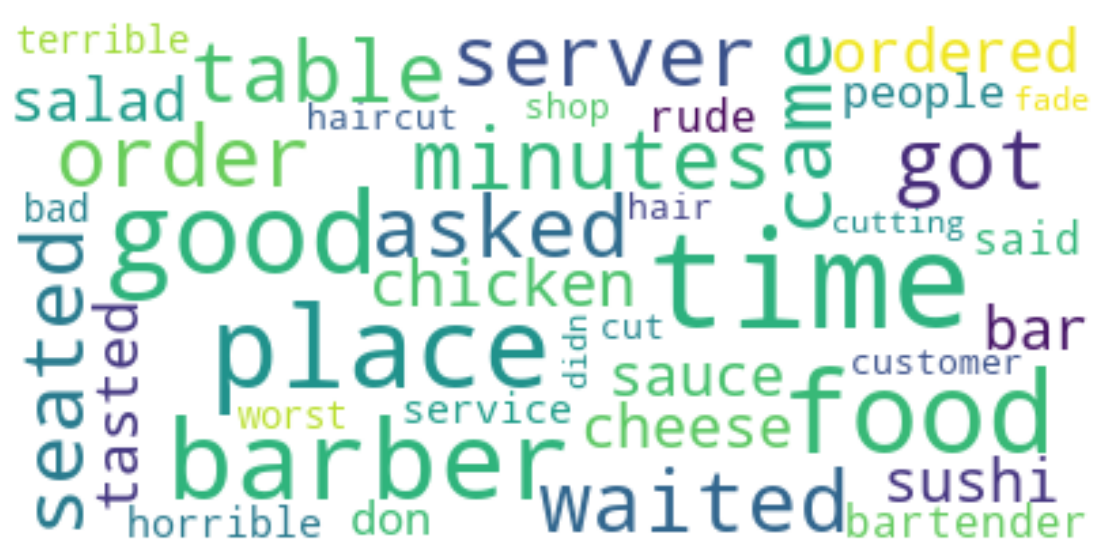

In [ ]:
#collapse-hide
wc1 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_one)
plt.figure(figsize=[20, 10])
plt.imshow(wc1, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc1.to_file('pictures/one_star.png');

Wordcloud 2 stars

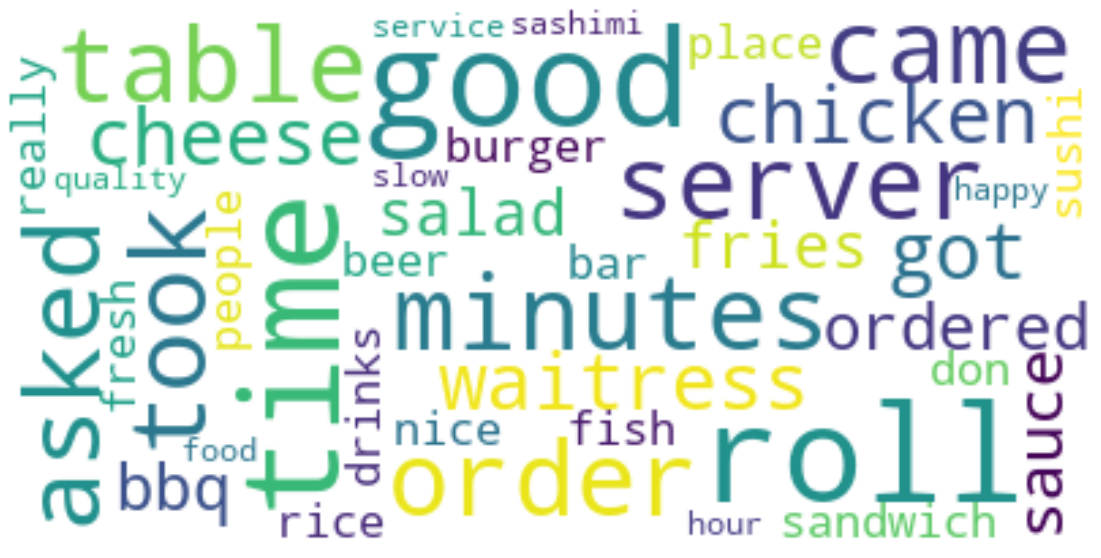

In [ ]:
#collapse-hide
wc2 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_two)
plt.figure(figsize= [20, 10]) 
plt.imshow(wc2, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc2.to_file('pictures/two_star.png');

Wordcloud 3 stars

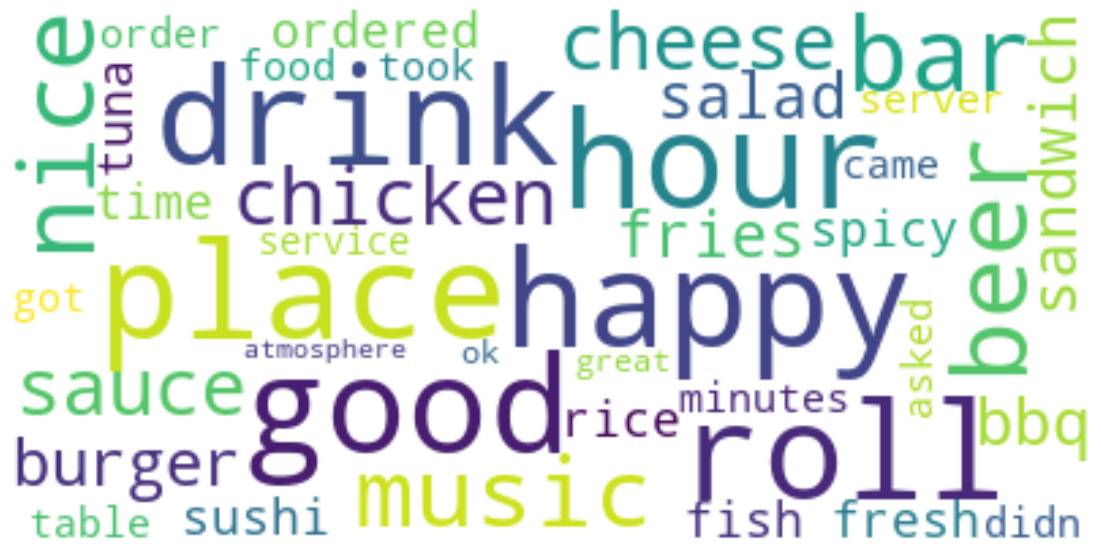

In [ ]:
#collapse-hide
wc3 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_three)
plt.figure(figsize= [20, 10]) 
plt.imshow(wc3, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc3.to_file('pictures/three_star.png');

Wordcloud 4 stars

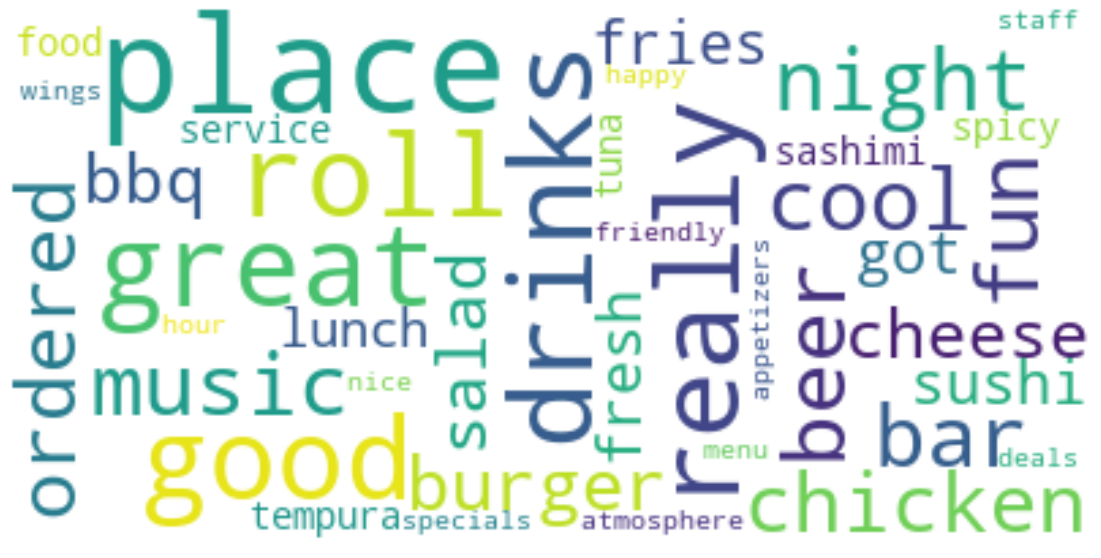

In [ ]:
#collapse-hide
wc4 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_four)
plt.figure(figsize= [20, 10])
plt.imshow(wc4, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc4.to_file('pictures/four_star.png');

Wordcloud 5 stars

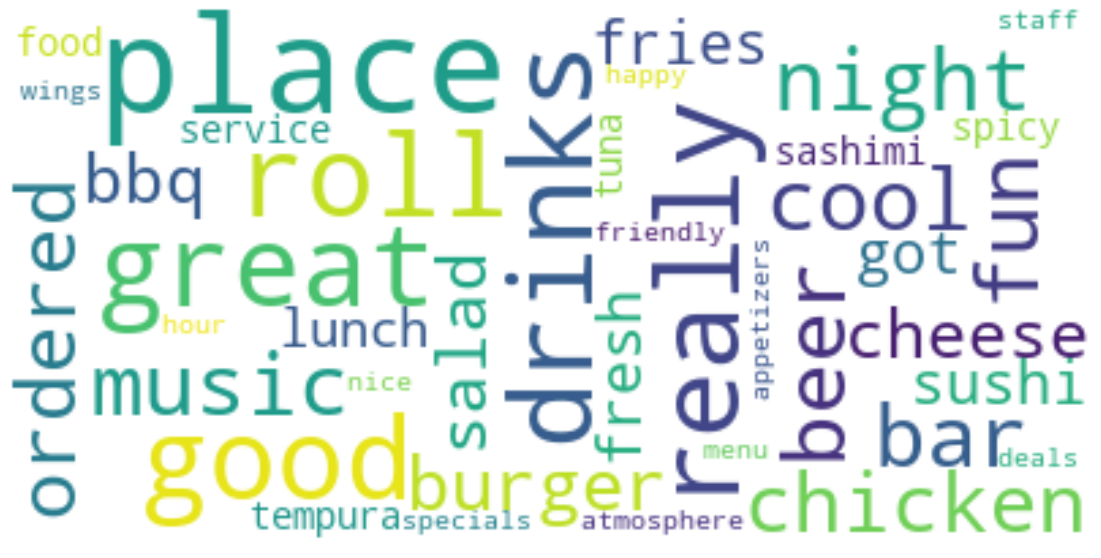

In [ ]:
#collapse-hide
wc5 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_five)
plt.figure(figsize= [20, 10])
plt.imshow(wc4, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc5.to_file('pictures/five_star.png');

Wordcloud positive experience

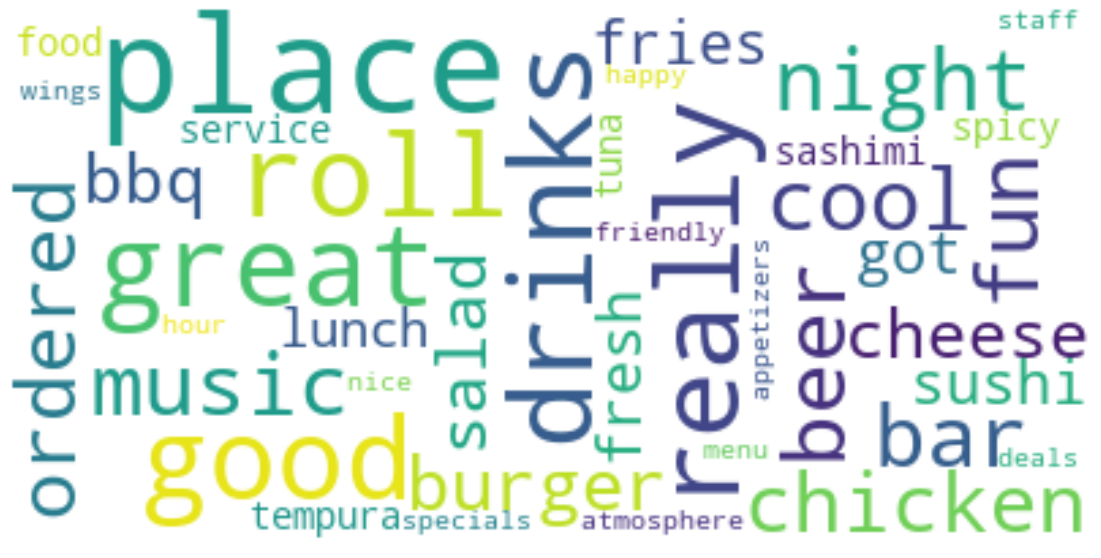

In [ ]:
#collapse-hide
wc6 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_positive)
plt.figure(figsize= [20, 10])
plt.imshow(wc4, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc6.to_file('pictures/positive.png');

Wordcloud negative experience

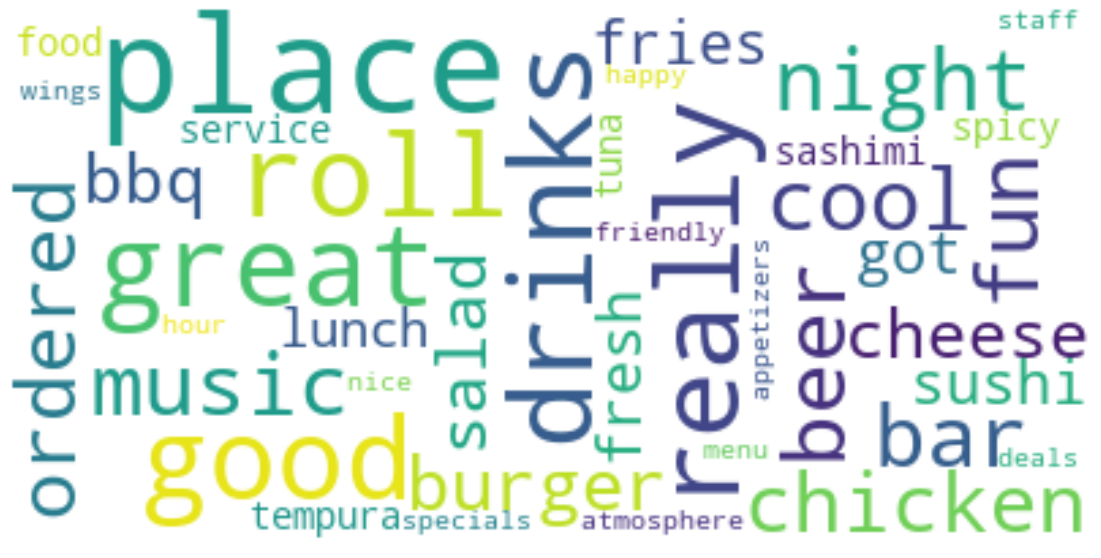

In [ ]:
#collapse-hide
wc7 = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_negative)
plt.figure(figsize= [20, 10])
plt.imshow(wc4, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc7.to_file('pictures/negative.png');

### Little Miss BBQ

In this section we inspect Little Miss BBQ as it is this business is rather liked in Phoenix.

#### Import data

In [ ]:
#collapse-hide
df = pd.read_csv('data/phoenix_users.csv')
df.head(3)

business_id                     name     city state  \
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  Phoenix    AZ   
2  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   

   postal_code  stars  review_count  is_open  \
0      85020.0    4.5            79        1   
1      85020.0    4.0           357        1   
2      85020.0    4.5            79        1   

                                          attributes  \
0  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
1  {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
2  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
1  Bars, Beer, Wine & Spirits, Sandwiches, Breakf...  3i095Fnh08yC-Q3VY0KeHQ   
2  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   

   review_stars                                               text  \
0             5  Our new favorite local spot. The owners are fa...   
1             5  This is our favorite local spot! The wings are...   
2             5  Stopped in at Irene's after work.  This place ...   

                  date  num_reviews_written  useful  \
0  2018-08-30 01:39:54                    5       1   
1  2018-08-30 01:37:47                    5       1   
2  2018-08-21 00:48:47                   12       4   

                                             friends  average_stars  \
0  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
1  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
2  p12DAvNJZ5szp8jP69NUbA, JdJ0b9QZKVrjv_nicDhABw...            5.0   

   experience  
0           1  
1           1  
2           1

Data Frame that only contains entries for Little Miss BBQ

In [ ]:
#collapse-hide
# Subset data set 
little_miss = df[df.name == 'Little Miss BBQ']
little_miss.head(3)

business_id             name     city state  postal_code  \
164   Xg5qEQiB-7L6kGJ5F4K3bQ  Little Miss BBQ  Phoenix    AZ      85034.0   
888   Xg5qEQiB-7L6kGJ5F4K3bQ  Little Miss BBQ  Phoenix    AZ      85034.0   
1155  Xg5qEQiB-7L6kGJ5F4K3bQ  Little Miss BBQ  Phoenix    AZ      85034.0   

      stars  review_count  is_open  \
164     5.0          2329        1   
888     5.0          2329        1   
1155    5.0          2329        1   

                                             attributes  \
164   {'RestaurantsDelivery': 'False', 'RestaurantsA...   
888   {'RestaurantsDelivery': 'False', 'RestaurantsA...   
1155  {'RestaurantsDelivery': 'False', 'RestaurantsA...   

                 categories                 user_id  review_stars  \
164   Barbeque, Restaurants  ocB1WhramMTkICc5sZ1bUQ             5   
888   Barbeque, Restaurants  sTcYq6goD1Fa2WS9MSkSvQ             5   
1155  Barbeque, Restaurants  ZE67Ck4gWtJBAN95AKMyZg             5   

                                                   text                 date  \
164   Hands down the best bbq I've had in my whole l...  2016-07-08 19:00:46   
888   Holy mother of god why did it take me so long ...  2017-11-07 18:22:17   
1155  I mean, does this place need another 5 star re...  2016-03-02 18:00:31   

      num_reviews_written  useful  \
164                   371     658   
888                   841    3749   
1155                   32     105   

                                                friends  average_stars  \
164   MfxdEmaH-0_ITpuXU4Hgzg, Jl3FZ3tPi0GpBIogfUNnPg...           3.71   
888   B820kFgFc1HyTFIuMoWH-w, PMe-hl9fP2g074H4SAfIKA...           3.62   
1155  Hyli6YWc-0PxRAerObzZIQ, LIj_X_4luQAWf3i10Gx1OA...           3.91   

      experience  
164            1  
888            1  
1155           1

In [ ]:
#hide
little_miss.shape

(2387, 19)

#### Vectorize text

We create the document term matrix here. The shape of the matrix (2387 x 7806) can be seen below along with the length of the vocabulary (7806). This means that we have 2387 reviews (documents) for Little Miss BBQ and got 7806 tokens after vectorization.

In [ ]:
#collapse-hide
# get reviews
text = little_miss.text

# vectorize
vectorizer = TfidfVectorizer(stop_words= 'english')
dtm = vectorizer.fit_transform(text).toarray()
vocab = np.array(vectorizer.get_feature_names())

# shape of dtm
dtm.shape, len(vocab)

((2387, 7806), 7806)

Helper function to extract top words

In [ ]:
#collapse-hide
# Helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

#### Matrix decomposition

We used the non-negative matrix factorization.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W = nnmf.fit_transform(dtm)
H = nnmf.components_

Topics extracted

In [ ]:
#collapse-hide
show_topics(H, vocab)

['line time got just people order good meat waiting parking',
 'bbq best ve miss phoenix hands little texas place az',
 'wait worth long line hour brisket amazing totally best definitely',
 'brisket ribs pork grits fatty sausage pulled beans beef pie',
 'great food service place friendly staff amazing awesome customer recommend']

#### Wordcloud Little Miss BBQ

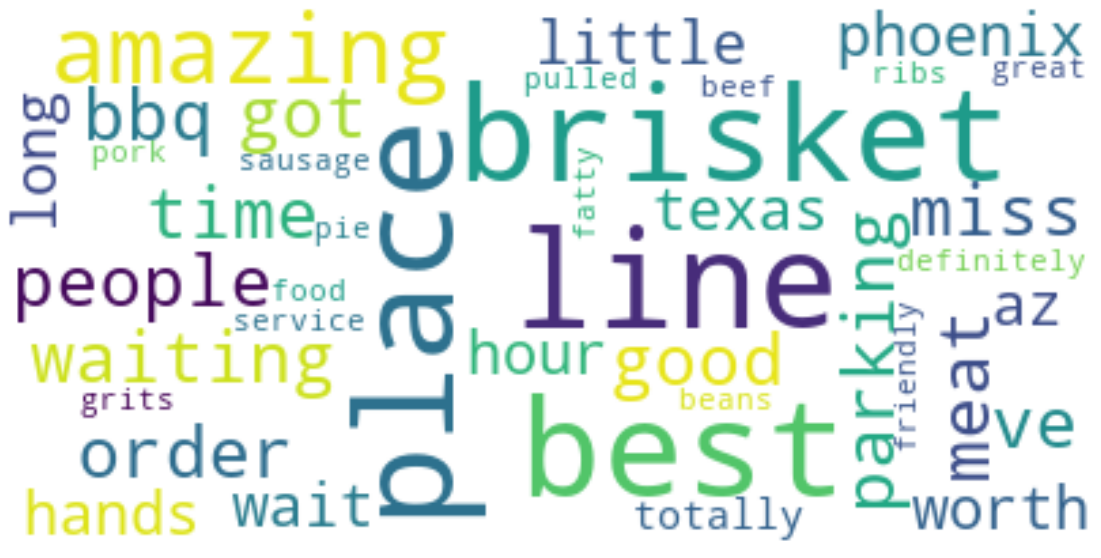

In [ ]:
#collapse-hide
words = show_topics(H, vocab)

# join list elements into one string
text_little_miss = " ".join(a for a in words)

wc = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_little_miss)
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc.to_file('pictures/little_miss_BBQ.png');

### Hooters

In this section we have a closer look at one of the worst performing business in Phoenix.

#### Import data

In [ ]:
#collapse-hide
data = pd.read_csv('data/phoenix_users.csv')
# Subset data set 
hooters = data[data.name == 'Hooters']
hooters.head(3)

business_id     name     city state  postal_code  stars  \
568   YZeUH6zYS0dq5QHLYZhUnQ  Hooters  Phoenix    AZ      85035.0    2.0   
734   k4qx8DacgRbM9vpVbWc3zA  Hooters  Phoenix    AZ      85004.0    2.0   
1129  k4qx8DacgRbM9vpVbWc3zA  Hooters  Phoenix    AZ      85004.0    2.0   

      review_count  is_open  \
568            106        1   
734            237        1   
1129           237        1   

                                             attributes  \
568   {'NoiseLevel': "'very_loud'", 'WiFi': "'no'", ...   
734   {'RestaurantsDelivery': 'False', 'BusinessAcce...   
1129  {'RestaurantsDelivery': 'False', 'BusinessAcce...   

                                             categories  \
568   Nightlife, American (Traditional), Chicken Win...   
734   Nightlife, Bars, Sports Bars, American (Tradit...   
1129  Nightlife, Bars, Sports Bars, American (Tradit...   

                     user_id  review_stars  \
568   zY4RR6kG0AgioqbgpXCsFg             1   
734   8Aj0YKThtXkSuauONIzYfQ             4   
1129  Z4jbHK1-U6pVfI6RfNUSow             3   

                                                   text                 date  \
568   I hate to give a one star, but this place need...  2019-01-19 03:05:09   
734   This downtown Phoenix Hooters has become a com...  2011-08-18 00:17:21   
1129  After catching a movie, I tagged along with my...  2018-05-24 23:02:41   

      num_reviews_written  useful  \
568                    50      12   
734                   176     313   
1129                   37      32   

                                                friends  average_stars  \
568   Ar1JMNPrOA4lCj8RkjmWoQ, XpofMKrKlQhx1hXunBPIqA...           3.85   
734   QyXoqXAxOV2DLNPOZKuEIw, F6uSoMUXNssNTlNRzfjXYg...           4.21   
1129  dlIugG_I6E3R6H35oDFC9w, _u_OiLc12aVBp9ckzKpvvg...           3.73   

      experience  
568            0  
734            1  
1129           0

#### Vectorize text

We create the document term matrix here. The shape of the matrix (478 x 3683) can be seen below along with the length of the vocabulary (3683). This means that we have 487 reviews (documents) for Hooters and got 3683 tokens after vectorization.

In [ ]:
#collapse-hide
text = hooters.text

# vectorize text
vectorizer = TfidfVectorizer(stop_words= 'english')
dtm = vectorizer.fit_transform(text).toarray()
vocab = np.array(vectorizer.get_feature_names())

# check dtm and vocab size
dtm.shape, len(vocab)

((478, 3683), 3683)

Helper function to extract top words

In [ ]:
#collapse-hide
# Helper function
def show_topics(H, vocab):
    top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_top_words-1:-1]]
    topic_words = ([top_words(x) for x in H])
    return [' '.join(x) for x in topic_words]

#### Matrix decomposition

We used the non-negative matrix factorization.

In [ ]:
#collapse-hide
d = 5 # number of topics
num_top_words = 10 # number of top words


nnmf = decomposition.NMF(n_components= d, max_iter= 500, random_state= 42)
W = nnmf.fit_transform(dtm)
H = nnmf.components_

Topics top words for Hooters

In [ ]:
#collapse-hide
show_topics(H, vocab)

['said manager asked just told came table tables wait did',
 'wings chicken ordered fries got hot sauce like salad buffalo',
 'great service atmosphere care server veronica job teams fish favorite',
 'good hooters food beer girls cold service place pretty bad',
 'minutes order waited service took food 20 worst waitress drinks']

#### Wordcloud Hooters

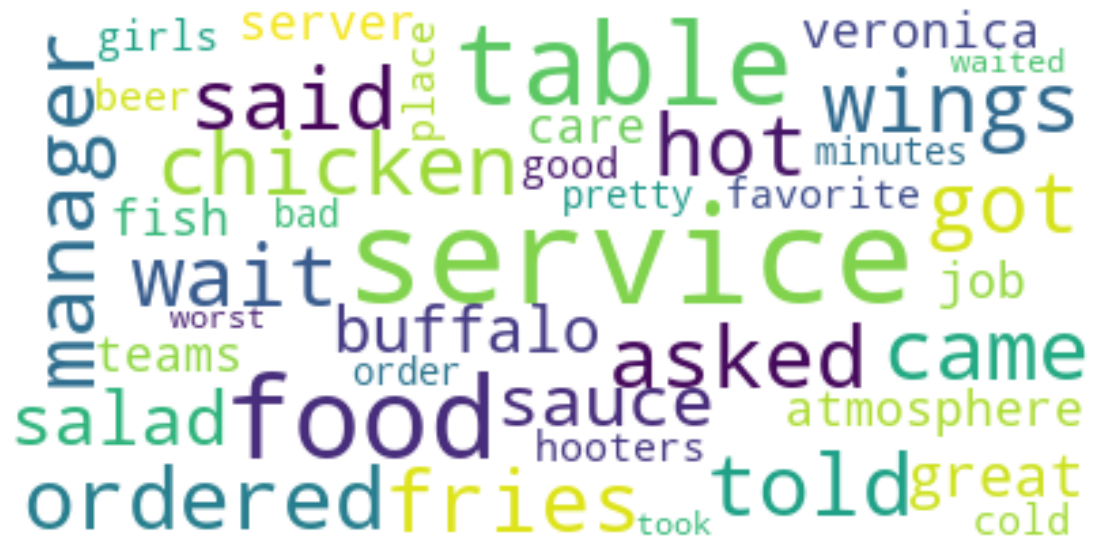

In [ ]:
#collapse-hide
words = show_topics(H, vocab)

# concatenate string elements into a string
text_hooters = " ".join(a for a in words)

wc = WordCloud(max_font_size= 50, max_words= 40, background_color= 'white').generate(text_hooters)
plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#hide
# Save wordcloud
wc.to_file('pictures/hooters.png');

### Summary of topic modeling

The outcome of the topic modeling corresponds to our intuition, that businesses would get bad reviewsif their staff was rude, the service took ages and the quality of the product was sub-optimal.
Words, such as "horrible", "terrible" and "rude" were found among the 1 star reviews, indicating, that potentially the staff was rude, as well as their overall experience was bad. The 2 star reviews contained words such as "slow" and "hour" which allows us to assume that the businesses were down-rated because of the speed of their service. Reviews from the 4, 5 star ranges seemed to highlight the fact, that the stuff was rather friendly, the product was fresh and good quality and the service was fast.
The above described tendency was found in the positive vs negative experience topic modeling too.

As the business called "Little Miss BBQ" was the best performing business in Phoenix, we looked into their reviews to see what could cause their success. The outcome seems to be that their service is rather friendly and their food (especially their meat products) are praised for their tastiness.
In order to get a more concrete view on what makes a business a "worst performing one", we looked into "Hooters" as their rating is 2 and a large number of reviews agree on the aforementioned star value. Their rating potentially can be explained by slow service and bad enough food.

## Supervised Machine Learning

In this section, we create a classifier that predicts the experience of the reviewer.

#### Read in data

In [ ]:
#collapse_hide
phoenix_sentiment = pd.read_csv('data/phoenix_users.csv')
phoenix_sentiment.head(3)

business_id                     name     city state  \
0  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   
1  ku9ak9cQnIGBCXBtRd61tQ  Spoke & Wheel - Phoenix  Phoenix    AZ   
2  Mmd5WDFq9hHcQ3uClngGjQ         Irene's Tap Room  Phoenix    AZ   

   postal_code  stars  review_count  is_open  \
0      85020.0    4.5            79        1   
1      85020.0    4.0           357        1   
2      85020.0    4.5            79        1   

                                          attributes  \
0  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   
1  {'NoiseLevel': "u'average'", 'WiFi': "u'free'"...   
2  {'WiFi': "u'free'", 'NoiseLevel': "u'average'"...   

                                          categories                 user_id  \
0  Bars, Arts & Entertainment, Nightlife, Music V...  3i095Fnh08yC-Q3VY0KeHQ   
1  Bars, Beer, Wine & Spirits, Sandwiches, Breakf...  3i095Fnh08yC-Q3VY0KeHQ   
2  Bars, Arts & Entertainment, Nightlife, Music V...  MeLrLNf-aoz9niUmRMmb9g   

   review_stars                                               text  \
0             5  Our new favorite local spot. The owners are fa...   
1             5  This is our favorite local spot! The wings are...   
2             5  Stopped in at Irene's after work.  This place ...   

                  date  num_reviews_written  useful  \
0  2018-08-30 01:39:54                    5       1   
1  2018-08-30 01:37:47                    5       1   
2  2018-08-21 00:48:47                   12       4   

                                             friends  average_stars  \
0  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
1  qQ61hXIe8U8jPXBf4q81WA, 2qmYYG0qoa7RGxW4EvRwdA...            4.2   
2  p12DAvNJZ5szp8jP69NUbA, JdJ0b9QZKVrjv_nicDhABw...            5.0   

   experience  
0           1  
1           1  
2           1

In [ ]:
#hide
# Create X and y
X = phoenix_sentiment.text
y = phoenix_sentiment.experience
X.shape, y.shape

((211114,), (211114,))

In [ ]:
#hide
# Split data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((179446,), (31668,), (179446,), (31668,))

#### Build pipeline

Pipeline allows us to combine preprocessing and modelling in one object (which can be useful as we can cross-validate different preprocessing methods with different potential model representations).

In [ ]:
#collapse-hide
# vectorizer
vectorizer = CountVectorizer(stop_words= 'english')

# model
classifier = MultinomialNB()

# pipeline
pipe = Pipeline([('vect', vectorizer), ('class', classifier)])

#### RandomizedSearchCV

This is a method to search through the space of different combinations of hyper-parameters. We used the randomized method to decrease the amount of computation needed. Instead, we could hve used GridSearchCV, however, we would have had to search through 288 (6 * 4 * 6 * 2) parameter combination. The cost for less computation is a slight chance that RandomizedSearchCV does not find the global best hyper-parameter combination, however this is rather unlikely.

In [ ]:
#collapse-hide
# dictionary of hyper parameter options
params = {}
params['vect__ngram_range'] = [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
params['vect__max_df'] = [1.0, 0.99, 0.98, 0.97]
params['class__alpha'] = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
params['class__fit_prior'] = [True, False]

RandomizedSearchCV that "tells" us the best hyper-parameter combination.

In [ ]:
#collpase-hide
CV = RandomizedSearchCV(pipe, params, cv= 3, scoring= 'accuracy')
CV.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(stop_words='english')),
                                             ('class', MultinomialNB())]),
                   param_distributions={'class__alpha': [1.0, 0.9, 0.8, 0.7,
                                                         0.6, 0.5],
                                        'class__fit_prior': [True, False],
                                        'vect__max_df': [1.0, 0.99, 0.98, 0.97],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3), (2, 2),
                                                              (2, 3), (3, 3)]},
                   scoring='accuracy')

In [ ]:
#collapse-hide
print('The best score and parameter combination is the following: ')
CV.best_score_, CV.best_params_

The best score and parameter combination is the following: 


(0.8963253460872941,
 {'vect__ngram_range': (1, 2),
  'vect__max_df': 0.99,
  'class__fit_prior': True,
  'class__alpha': 0.7})

#### Recreate best performing pipeline

In [ ]:
#collapse-hide
# Build best performing vectorizer and model into a pipeline 
pipe_best = make_pipeline(CountVectorizer(stop_words= 'english', ngram_range= (1, 2), max_df= 0.99), 
                          MultinomialNB(alpha= 0.7))

# fit pipeline with training data
pipe_best.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.99, ngram_range=(1, 2),
                                 stop_words='english')),
                ('multinomialnb', MultinomialNB(alpha=0.7))])

#### Model Evaluation

Get baseline accuracy

In [ ]:
#collapse-hide
# Get predictions for the test set
y_pred = pipe_best.predict(X_test)
phoenix_sentiment.experience.value_counts(normalize= True)

1    0.704534
0    0.295466
Name: experience, dtype: float64

If we predict positive sentiment for all entries, we get it right 70% of the time.

Get accuracy of pipeline

In [ ]:
#collapse-hide
metrics.accuracy_score(y_test, y_pred)

0.8983832259694329

Confusion matrix

In [ ]:
#collapse-hide
metrics.confusion_matrix(y_test, y_pred)

array([[ 7015,  2401],
       [  817, 21435]], dtype=int64)

Assign the different entries of the matrix to variables, to create other performance evaluation metrics below.

In [ ]:
#collapse-hide
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Summary of model performance

In [ ]:
#collapse-hide
data = {'Sensitivity': sen, 'Specificity': spe, 'False positive rate': fpr, 'Precision': prec}
pd.DataFrame(data= data, index= [0], dtype= np.float32)

Sensitivity  Specificity  False positive rate  Precision
0     0.963284     0.745008             0.254992    0.89927

The model does a good job of identifying true positives and an "OK" job of identifying the true negatives. We are happy with the model performance, as the precision (positive predictive value) is close to 90 %.

Below the intended use-case is visible. The business would write their hypothetical review and check what the model predicts it to be, therefore they can either include or exclude that potential feature from their business plan. Label 1 corresponds to positive experience, 0 corresponds to negative experience.

In [ ]:
#collapse-hide
test = 'Friendly stuff and awesome decoration, loved it'
test1 = 'Rude service, expensive drinks'
test2 = 'The drink was cheap but the dance floor was way too small'
test3 = 'The drink was cheap and the dance floor was large'
test4 = 'The music was quite loud and got me to dance'

pred = pipe_best.predict([test])
pred1 = pipe_best.predict([test1])
pred2 = pipe_best.predict([test2])
pred3 = pipe_best.predict([test3])
pred4 = pipe_best.predict([test4])

print(f"{test} is {pred}")
print(f"{test1} is {pred1}")
print(f"{test2} is {pred2}")
print(f"{test3} is {pred3}")
print(f"{test4} is {pred4}")

Friendly stuff and awesome decoration, loved it is [1]
Rude service, expensive drinks is [0]
The drink was cheap but the dance floor was way too small is [0]
The drink was cheap and the dance floor was large is [1]
The music was quite loud and got me to dance is [1]


In [ ]:
#hide
# Save model parameters
# Following the practices of Data Science, we created a saved version of the model that could later be deployed.
# Serialize best case pipeline
joblib.dump(CV.best_estimator_, 'best_model.pkl')

['best_model.pkl']

#### Summary of Supervised Machine Learning

We used the combination of pipelines and randomized search CV. According to our studies, this is a really powerful way to develop proficient models. Moreover, we decided to create a test set, that was only used for validation (not even used in grid search) in order to get the most unbiased estimate of accuracy. We used CountVectorizer to represent text numerically, as MultinomialNB may have problems working with non-integer values.
We imagined that this model could be useful for businesses to keep track of the customers who provide a bad review and potentially, the business can follow up with that customer to improve their experience and as a consequence increase the busnibusiness's overall rating. An evaluation criterion for this specific use-case that should be as high as possible is the specifity, thus the business could reach out to the highest number of customers who had a potentially negative experience. 